In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from weighted_AUC_mat_intersected_targets import normalized_by_target_norm, find_significant_weights
from weighted_AUC_mat_intersected_targets import main_fn, find_intersect_and_union_targets
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
p2df = '/data/cima/hsc_DF_for_simic_100_2000_MAD.pickle'
p2res = '/data/cima/hsc_simic_1.6_100_2000_MAD.pickle'
# p2saved_AUC = '/data/cima/AUC'

In [3]:
normalized_weights, original_df, TF_ids, target_ids = normalized_by_target_norm(p2df, p2res)

In [6]:
sig_ind_dict, sig_target_ids_dict, intersected_targets_dict, intersect_indicator = find_intersect_and_union_targets(normalized_weights, TF_ids, target_ids)

In [7]:
print(sig_target_ids_dict.keys())

dict_keys([0, 1, 2])


In [8]:
print(sig_target_ids_dict[0].keys())

dict_keys(['ARID1A', 'SFPQ', 'YBX1', 'JUN', 'MIER1', 'PHTF1', 'POGZ', 'CREB3L4', 'PBX1', 'KDM5B', 'ATF3', 'ARID4B', 'DNMT3A', 'BCL11A', 'REL', 'ZC3H8', 'ZEB2', 'NR4A2', 'SP100', 'LRRFIP1', 'SATB1', 'LRRFIP2', 'CSRNP1', 'SMARCC1', 'FOXP1', 'BBX', 'KLF15', 'TFDP2', 'MXD4', 'REST', 'ZBED3', 'MEF2C', 'IRF1', 'JARID2', 'SOX4', 'ATF6B', 'HMGA1', 'CDC5L', 'ZNF292', 'ZKSCAN1', 'TSC22D4', 'CUX1', 'DNAJC2', 'IRF5', 'CNOT4', 'CREB3L2', 'NONO', 'ATRX', 'TSC22D3', 'EGR3', 'KLF10', 'NR4A3', 'KLF4', 'KMT2A', 'ZBTB44', 'KLF6', 'ZNF33A', 'ZNF22', 'TFAM', 'ARID5B', 'KAT6B', 'HHEX', 'ETV6', 'ATF1', 'NR4A1', 'NFE2', 'MLXIP', 'ELF1', 'TSC22D1', 'TOX4', 'MAX', 'FOS', 'FOXN3', 'YY1', 'TCF25', 'NCOR1', 'SMARCE1', 'STAT3', 'HLF', 'ZNF521', 'ID1', 'TCF3', 'HMG20B', 'ZNF562', 'DNMT1', 'JUNB', 'KLF2', 'JUND', 'RFXANK', 'ZNF90', 'ZNF431', 'ZNF302', 'NFKBID', 'FOSB', 'ZNF581', 'ZNF814', 'XBP1', 'ATF4', 'PHF5A', 'RUNX1'])


In [10]:
print(sig_target_ids_dict[0]['ARID1A'].keys())

dict_keys(['target_index', 'target_names'])


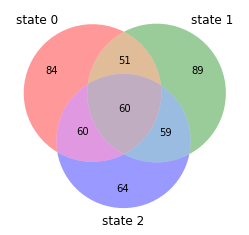

intersected genes of three states:
['TEAD2', 'MEF2A', 'MYBL2', 'GFI1', 'PRDM5', 'ZNF528', 'ZNF506', 'ZNF558', 'ZNF516', 'ZNF10', 'AEBP2', 'FOXM1', 'MTA2', 'ZXDA', 'ZNF501', 'ID4', 'ZFY', 'ZNF74', 'HIF3A', 'ZNF155', 'ZNF404', 'ZNF14', 'ZNF232', 'TBPL2', 'KLF5', 'SOHLH2', 'ZNF84', 'ZNF384', 'EMX2', 'WT1', 'ZNF696', 'ZBTB24', 'ZNF165', 'ZNF322', 'EBF1', 'WHSC1', 'ETV5', 'HESX1', 'CASP2', 'ZNF670', 'ELK4', 'PDZK1IP1', 'CCDC184', 'CENPU', 'ZBTB45', 'ZNF799', 'ZNF823', 'MIER2', 'NEUROD2', 'ZBTB4', 'CTCF', 'ZNF48', 'EGR2', 'FOSL1', 'ASCL2', 'AR', 'MXD3', 'GABARAPL1', 'PAX8', 'MYCN']


In [12]:
def venn_graph_of_TF(tf, sig_target_ids_dict, intersected_targets_dict):
#     tf = 'Nfic'
    s0 = set(sig_target_ids_dict[0][tf]['target_names'])
    s1 = set(sig_target_ids_dict[1][tf]['target_names'])
    s2 = set(sig_target_ids_dict[2][tf]['target_names'])

    target_all_intersect = intersected_targets_dict[tf]['target_names']
  
    venn3([s0, s1, s2], ('state 0', 'state 1', 'state 2'))
    plt.show()
    print('intersected genes of three states:')
    print(target_all_intersect)

venn_graph_of_TF('ARID1A', sig_target_ids_dict, intersected_targets_dict)

ARID1A


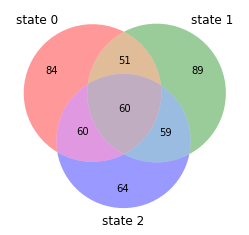

intersected genes of three states:
['TEAD2', 'MEF2A', 'MYBL2', 'GFI1', 'PRDM5', 'ZNF528', 'ZNF506', 'ZNF558', 'ZNF516', 'ZNF10', 'AEBP2', 'FOXM1', 'MTA2', 'ZXDA', 'ZNF501', 'ID4', 'ZFY', 'ZNF74', 'HIF3A', 'ZNF155', 'ZNF404', 'ZNF14', 'ZNF232', 'TBPL2', 'KLF5', 'SOHLH2', 'ZNF84', 'ZNF384', 'EMX2', 'WT1', 'ZNF696', 'ZBTB24', 'ZNF165', 'ZNF322', 'EBF1', 'WHSC1', 'ETV5', 'HESX1', 'CASP2', 'ZNF670', 'ELK4', 'PDZK1IP1', 'CCDC184', 'CENPU', 'ZBTB45', 'ZNF799', 'ZNF823', 'MIER2', 'NEUROD2', 'ZBTB4', 'CTCF', 'ZNF48', 'EGR2', 'FOSL1', 'ASCL2', 'AR', 'MXD3', 'GABARAPL1', 'PAX8', 'MYCN']
-------
SFPQ


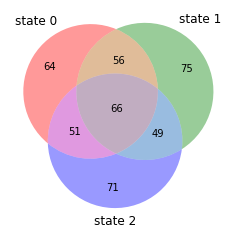

intersected genes of three states:
['TEAD2', 'TRPS1', 'ZNF707', 'PRDM5', 'RORA', 'KLF16', 'ZNF784', 'ZNF616', 'ZNF257', 'IRF8', 'ZNF10', 'FOXM1', 'ZXDA', 'PPARD', 'ZNF695', 'ZNF213-AS1', 'MICU1', 'ID4', 'BHLHE41', 'PPARA', 'ZNF837', 'ZNF671', 'HIF3A', 'ZNF793', 'ZNF208', 'ZNF253', 'ZNF14', 'ZNF700', 'ZNF69', 'ZNF554', 'NR1D1', 'TBPL2', 'SOHLH2', 'EMX2', 'ELF5', 'WT1', 'RC3H2', 'ZNF696', 'FOXO4', 'ZBED1', 'ZBTB24', 'ZNF165', 'EBF1', 'CLOCK', 'MSX1', 'ZNF639', 'MIXL1', 'MTF1', 'ANXA2', 'GAS6-AS1', 'RP11-556E13.1', 'SERPINB9', 'ANKRD49', 'ZNF211', 'ZNF574', 'ZNF823', 'KLHL12', 'BATF2', 'ASCL2', 'NFIL3', 'EHD4', 'ETV7', 'FAM46C', 'NR1D2', 'MYCN', 'AZU1']
-------
YBX1


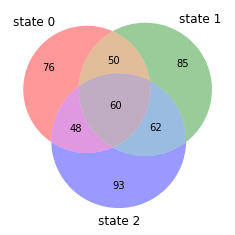

intersected genes of three states:
['ZNF781', 'TRPS1', 'ATF2', 'MYBL2', 'ZNF577', 'GFI1', 'PRDM5', 'RORA', 'ZFHX3', 'ZNF257', 'IRF8', 'FOXO1', 'PPARD', 'ZBTB7B', 'HUWE1', 'TMOD3', 'ID4', 'BHLHE41', 'PPARA', 'HIF3A', 'FOXA3', 'ZNF575', 'ZNF507', 'ZNF700', 'ZNF69', 'RFX2', 'RARA', 'NR1D1', 'ESR2', 'TBPL2', 'NFATC4', 'SOHLH2', 'ELF5', 'WT1', 'ZNF696', 'ZNF786', 'ZNF184', 'EBF1', 'ZNF654', 'KLF7', 'SP3', 'ZNF496', 'ZNF670', 'CPVL', 'SUCLG2', 'DMRTA1', 'ZBTB45', 'ZNF296', 'NR2F6', 'ZNF799', 'MAFG', 'SMAD3', 'MTA1', 'RFXAP', 'PSPC1', 'EGR2', 'NFKBIE', 'THRB', 'PAX8', 'MYCN']
-------
JUN


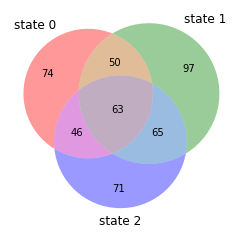

intersected genes of three states:
['TEAD2', 'TRPS1', 'ATF2', 'ZNF577', 'E2F6', 'RORA', 'ZNF350', 'KLF16', 'CYFIP2', 'ZNF808', 'ZNF257', 'ZNF558', 'SNAI3', 'IRF8', 'VDR', 'ZXDA', 'PPARD', 'ZNF695', 'ZBTB7B', 'ZNF17', 'CTD-3184A7.4', 'BMS1', 'PI4KA', 'ID4', 'ZFY', 'ZNF74', 'ZNF837', 'ZNF835', 'HIF3A', 'ZNF540', 'ZNF208', 'ZNF554', 'ADNP', 'NR1D1', 'TADA2A', 'HIF1A', 'NFATC4', 'KLF5', 'SOHLH2', 'ELF5', 'WT1', 'ZNF212', 'ZNF3', 'HSF2', 'ZSCAN26', 'EBF1', 'MSX1', 'ZNF639', 'ZNF654', 'ZNF496', 'LINC01089', 'LYPD6B', 'MBTD1', 'RPL39L', 'TBK1', 'DMRTA1', 'CEBPA', 'NR2F6', 'ZNF799', 'ZNF823', 'NCOA3', 'MAF', 'EGR2']
-------
MIER1


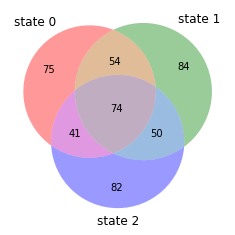

intersected genes of three states:
['ZNF781', 'TRPS1', 'ATF2', 'ZNF577', 'ZNF71', 'GFI1', 'RORA', 'ZNF629', 'RUNX2', 'KLF16', 'ZNF528', 'ZNF616', 'ZNF558', 'IRF8', 'CREM', 'ZXDA', 'ID4', 'BHLHE41', 'ZNF416', 'HIF3A', 'RELB', 'ZNF227', 'ZNF155', 'ZNF404', 'ZNF208', 'ZNF14', 'ZNF443', 'ZNF700', 'HOXB7', 'RARA', 'NR1D1', 'ZNF263', 'ZNF774', 'HIF1A', 'TFDP1', 'KLF5', 'SOHLH2', 'ZNF84', 'STAT2', 'TFCP2', 'ZNF384', 'EMX2', 'WT1', 'ZNF143', 'RC3H2', 'ZSCAN21', 'ZNF165', 'EBF1', 'CLOCK', 'MSX1', 'ETV5', 'HESX1', 'ZNF514', 'TMEM106A', 'SNHG10', 'LYPD6B', 'NOTCH4', 'RP11-556E13.1', 'TBK1', 'DMRTA1', 'MAFF', 'CEBPA', 'ZNF823', 'HYPK', 'ZNF48', 'LGALS1', 'EGR2', 'KDM2A', 'FOSL1', 'BATF2', 'ASCL2', 'ZNF711', 'UBQLN2', 'MYCN']
-------
PHTF1


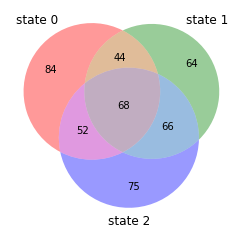

intersected genes of three states:
['TEAD2', 'ZNF335', 'ZNF577', 'RORA', 'ZFHX3', 'ZNF667', 'ZNF528', 'FOXO1', 'ARID2', 'CREB3', 'PPARD', 'ZNF695', 'FOXJ3', 'ZNF17', 'BHLHE41', 'HCFC1', 'PPARA', 'ZNF837', 'ZNF816', 'ZNF575', 'ZNF507', 'ZNF208', 'ZNF443', 'ZNF627', 'RFX2', 'ZNF77', 'NR1D1', 'ZNF774', 'ESR2', 'TBPL2', 'NFATC4', 'ZNF384', 'EMX2', 'ELF5', 'ZNF696', 'ZNF275', 'FOXO4', 'ZNF212', 'ZSCAN21', 'ZNF322', 'ZNF654', 'ZNF514', 'ZNF512', 'ZNF670', 'SNHG10', 'LINC01089', 'C21orf58', 'HDAC5', 'LYPD6B', 'TOMM5', 'NOTCH4', 'AFF3', 'SMIM4', 'DMRTA1', 'ZNF211', 'ZNF444', 'ZNF98', 'CEBPB', 'MAFG', 'SREBF1', 'MAF', 'BATF2', 'WIPI2', 'GATA1', 'EHD4', 'AHR', 'NFKBIE', 'PAX8']
-------
POGZ


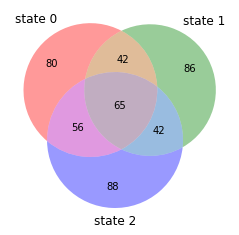

intersected genes of three states:
['TEAD2', 'KLF3', 'MYBL2', 'ZNF577', 'PRDM5', 'KLF16', 'ZNF528', 'ZNF616', 'IRF8', 'GATC', 'VDR', 'FOXM1', 'PRKRIR', 'PPARD', 'ZBTB7B', 'GLA', 'CMIP', 'ID4', 'ZFY', 'BHLHE41', 'PPARA', 'ATF5', 'ZNF443', 'ZNF69', 'ZNF57', 'PMS2', 'ZNF652', 'ZNF174', 'ESR2', 'TBPL2', 'NFATC4', 'ZNF268', 'STAT2', 'EMX2', 'ELF5', 'ZNF275', 'EBF1', 'ZNF141', 'ETV5', 'ZNF639', 'ZNF654', 'MIXL1', 'CUL1', 'CCDC184', 'MFSD14A', 'CENPU', 'DMRTA1', 'ZNF211', 'ZNF296', 'LYL1', 'ZNF799', 'ZNF266', 'CEBPB', 'HOXB4', 'NEUROD2', 'ZBTB4', 'EGR2', 'FOSL1', 'ASCL2', 'ZNF711', 'AHR', 'ETV7', 'FAM46C', 'PAX8', 'HIVEP3']
-------
CREB3L4


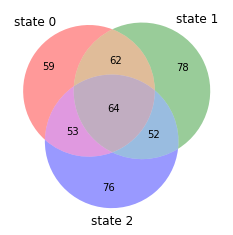

intersected genes of three states:
['ZNF781', 'MYBL2', 'ZNF71', 'ZNF566', 'ZNF784', 'ZNF558', 'SNAI3', 'IRF8', 'ZNF10', 'VDR', 'PPARD', 'LINC00969', 'ID4', 'ZNF550', 'ZNF835', 'ZNF816', 'HIF3A', 'ZNF155', 'ZNF540', 'ZNF792', 'ZNF507', 'ZNF443', 'ZNF700', 'HOXB7', 'NR1D1', 'ZNF263', 'ZNF774', 'ESR2', 'NFATC4', 'SOHLH2', 'EMX2', 'ZNF239', 'ESRRA', 'ELF5', 'WT1', 'ZNF462', 'ZNF696', 'THAP1', 'FOXO4', 'ZNF786', 'ZSCAN21', 'ZNF184', 'ZNF639', 'ZNF654', 'HESX1', 'PRDM16', 'FXYD6', 'SUCLG2', 'CPA3', 'HPGD', 'CEBPA', 'HYPK', 'HOXB4', 'NEUROD2', 'SREBF1', 'NFKB2', 'EGR2', 'BATF2', 'DEAF1', 'AR', 'EHD4', 'ETV7', 'RXRB', 'HLX']
-------
PBX1


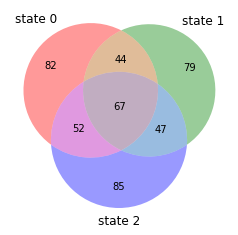

intersected genes of three states:
['TEAD2', 'MEF2A', 'MYBL2', 'E2F6', 'GFI1', 'PRDM5', 'KAT6A', 'ZNF629', 'HMGXB3', 'ZNF784', 'ZNF616', 'ZNF345', 'ZNF516', 'IRF8', 'FOXM1', 'MTA2', 'ZNF501', 'ZNF695', 'ZBTB7B', 'BHLHE41', 'ZNF416', 'ZNF835', 'HIF3A', 'ZNF227', 'ZNF155', 'ZNF404', 'ZNF208', 'ZNF443', 'ZNF700', 'ZNF57', 'HOXB7', 'NR1D1', 'TFAP4', 'ZNF774', 'ESR2', 'TBPL2', 'NFATC4', 'KLF5', 'ZNF384', 'ELF5', 'WT1', 'ZNF143', 'PBX3', 'RC3H2', 'CERS6', 'ZNF786', 'THAP5', 'FOXK1', 'ELANE', 'GAS6-AS1', 'HDAC5', 'SUCLG2', 'NUP54', 'TBK1', 'ZNF211', 'ZNF331', 'ZNF181', 'ZNF799', 'MIER2', 'CEBPB', 'MAFG', 'SREBF1', 'MESP1', 'BATF2', 'NFKBIE', 'SMAD1', 'NR1D2']
-------
KDM5B


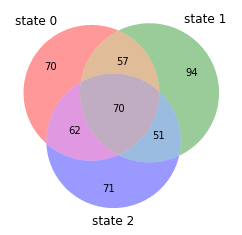

intersected genes of three states:
['TEAD2', 'ZNF71', 'GFI1', 'RORA', 'ZNF629', 'ZNF808', 'IRF8', 'FOXO1', 'MTA2', 'NR1H3', 'ZXDA', 'ZNF501', 'ZBTB7B', 'RERE', 'ESYT2', 'SCAI', 'ID4', 'BHLHE41', 'ZNF816', 'HIF3A', 'ZNF227', 'ZNF155', 'ZNF793', 'ZNF208', 'ZNF77', 'ZNF555', 'HOXB7', 'ZFP90', 'ZNF263', 'ZNF774', 'HIF1A', 'NFATC4', 'SOHLH2', 'TFCP2', 'EMX2', 'ZNF883', 'ZNF16', 'ZNF696', 'PLAG1', 'ZNF212', 'ZNF786', 'ZNF354A', 'PURA', 'ZNF670', 'MTF1', 'PDCD4-AS1', 'FXYD6', 'TIPARP', 'DCAF8', 'SYCE1L', 'TBK1', 'DMRTA1', 'KDM5D', 'ZNF98', 'NR2F6', 'ZNF559', 'NCOA3', 'NFATC1', 'NEUROD2', 'SREBF1', 'FOSL1', 'ZNF408', 'ASCL2', 'NFIL3', 'GATA1', 'ZNF467', 'THRB', 'PAX8', 'MYCN', 'HLX']
-------
ATF3


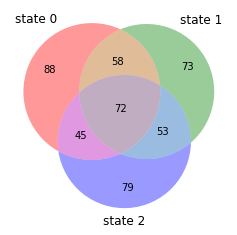

intersected genes of three states:
['ZNF577', 'PRDM5', 'KAT6A', 'ZNF616', 'ZNF10', 'VDR', 'MTA2', 'PPARD', 'ZNF76', 'ZNF501', 'ZBTB48', 'CMIP', 'BHLHE41', 'ZNF837', 'ZNF416', 'ZNF550', 'ZNF835', 'ZNF320', 'HIF3A', 'ZNF227', 'ZNF575', 'ZNF507', 'ZNF208', 'ZNF700', 'RFX2', 'ZNF77', 'ZNF554', 'ZFP90', 'ZNF174', 'ZBTB1', 'ESR2', 'TBPL2', 'NFATC4', 'SOHLH2', 'ZNF268', 'ZNF384', 'EMX2', 'ZNF239', 'ELF5', 'CERS6', 'ZNF275', 'ZNF3', 'FOXK1', 'ZBTB24', 'CLOCK', 'ZNF141', 'ETV5', 'ZNF639', 'HESX1', 'SP3', 'MIXL1', 'GAS6-AS1', 'CPVL', 'KANSL1-AS1', 'SYCE1L', 'HPGD', 'DMRTA1', 'ZBTB45', 'ZNF574', 'LYL1', 'KLF1', 'ZNF266', 'ZNFX1', 'KLHL12', 'HYPK', 'NEUROD2', 'SMAD3', 'MTA1', 'NKX2-3', 'AHR', 'ETV7', 'MYCN']
-------
ARID4B


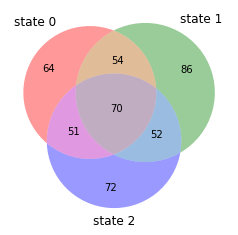

intersected genes of three states:
['TEAD2', 'ZNF891', 'ZNF335', 'GFI1', 'PRDM5', 'RORA', 'KLF16', 'ZNF808', 'ZNF528', 'ZNF616', 'ZNF506', 'PPIP5K2', 'ZNF558', 'IRF8', 'VDR', 'ZXDA', 'PPARD', 'ZBTB7B', 'GMEB1', 'ID4', 'BHLHE41', 'PPARA', 'ZNF835', 'ZNF320', 'HIF3A', 'ZNF726', 'ZNF253', 'ZNF443', 'ZNF700', 'ZNF57', 'ZNF554', 'HOXB5', 'ANKLE2', 'ZNF232', 'ZNF774', 'IQGAP1', 'NFATC4', 'TFDP1', 'KLF5', 'SOHLH2', 'ESRRA', 'WT1', 'ZNF275', 'ZNF212', 'THAP5', 'ZNF165', 'EBF1', 'MSX1', 'WHSC1', 'ZNF141', 'ZNF670', 'ZBED6', 'MTF1', 'NLRP3', 'SUCLG2', 'MBTD1', 'NUPR2', 'CPA3', 'ZNF444', 'CEBPA', 'KLF1', 'SVOPL', 'CEBPB', 'MTA1', 'ASCL2', 'GATA1', 'EHD4', 'ETV7', 'PAX8', 'MYCN']
-------
DNMT3A


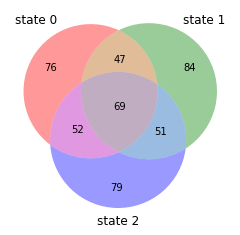

intersected genes of three states:
['TEAD2', 'ZNF891', 'GFI1', 'ZNF566', 'ZNF528', 'ZNF345', 'ZNF506', 'IRF8', 'VDR', 'AEBP2', 'FOXM1', 'PRKRIR', 'ZXDA', 'PPARD', 'ZNF695', 'ID4', 'ZNF416', 'ZNF540', 'ZNF208', 'ZNF253', 'ZNF14', 'ZNF443', 'ZNF69', 'ZNF77', 'ZNF555', 'ADNP', 'HOXB7', 'NR1D1', 'ZNF232', 'ZNF263', 'ESR2', 'TBPL2', 'ZNF384', 'EMX2', 'ZNF239', 'ELF5', 'PBX3', 'ZNF696', 'ELK1', 'ZNF786', 'HSF2', 'ZNF184', 'ZNF354A', 'EBF1', 'MSX1', 'ZNF141', 'ETV5', 'ZNF639', 'DPEP2', 'HESX1', 'SP3', 'LINC00665', 'RP5-940J5.9', 'C12orf73', 'CCDC184', 'PCCB', 'SYCE1L', 'METAP1', 'ZBTB45', 'ZNF296', 'ZNF181', 'ZNF98', 'ZNF266', 'HOXB6', 'MAF', 'EGR2', 'NFIL3', 'ZNF711', 'NR1D2']
-------
BCL11A


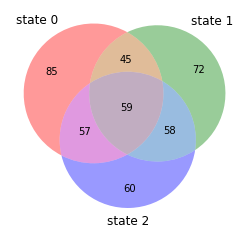

intersected genes of three states:
['TEAD2', 'MEF2A', 'MYBL2', 'ZNF577', 'PRDM5', 'ZNF784', 'ZNF808', 'ZNF528', 'ZNF616', 'IRF8', 'ZNF10', 'VDR', 'AEBP2', 'MTA2', 'ZXDA', 'ZNF501', 'ZNF837', 'ZNF671', 'DAAM1', 'ZNF575', 'ZNF540', 'ZNF507', 'ZNF77', 'ZNF57', 'ZNF554', 'PMS2', 'ZNF774', 'MGA', 'ZBTB1', 'ZNF696', 'PLAG1', 'TFE3', 'ZNF786', 'EBF1', 'WHSC1', 'SP140L', 'ZNF496', 'ZNF362', 'GPAT3', 'PHF1', 'NLRP3', 'RP11-14N7.2', 'NUP54', 'NOTCH4', 'DLK1', 'MTHFD2', 'DMRTA1', 'KDM5D', 'CEBPA', 'KLF1', 'ZNF799', 'ZNF823', 'CEBPB', 'ZNF711', 'HBP1', 'BAALC-AS2', 'GABARAPL1', 'BHLHE40', 'HIVEP3']
-------
REL


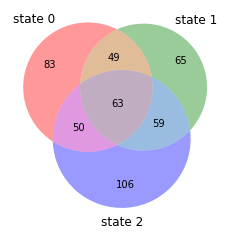

intersected genes of three states:
['TEAD2', 'ZNF605', 'KLF3', 'ZNF335', 'GFI1', 'ZNF707', 'ZNF784', 'ZNF808', 'ZNF616', 'ZNF516', 'IRF8', 'GATC', 'ZNF140', 'AEBP2', 'NR1H3', 'ZXDA', 'ZNF501', 'ZBTB7B', 'FOXJ3', 'CTD-3074O7.5', 'ID4', 'ZFY', 'ZNF671', 'ZNF416', 'ZNF835', 'HIF3A', 'RELB', 'ZNF227', 'ZNF155', 'ZNF540', 'ZNF208', 'ZNF253', 'ZNF14', 'HOXB7', 'NR1D1', 'TADA2A', 'ESR2', 'TFDP1', 'SOHLH2', 'ZNF384', 'ELF5', 'TFE3', 'ZNF212', 'ZNF786', 'ZNF165', 'CLOCK', 'ELANE', 'ELP6', 'C9orf139', 'TYW1', 'KLHL23', 'SYCE1L', 'LRR1', 'DMRTA1', 'ZBTB45', 'CEBPA', 'NR2F6', 'MIER2', 'MTA1', 'PSPC1', 'NFKB2', 'NFIL3', 'ETV7']
-------
ZC3H8


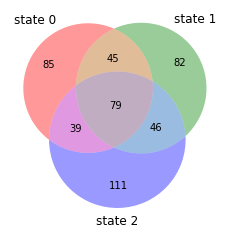

intersected genes of three states:
['TEAD2', 'MEF2A', 'ZNF781', 'MYBL2', 'ZNF566', 'KLF16', 'ZNF784', 'ZNF528', 'ZNF616', 'ZNF506', 'ZNF558', 'IRF8', 'ZXDA', 'ZNF76', 'ZBTB7B', 'RERE', 'ZNF17', 'CMIP', 'ADAL', 'TES', 'ID4', 'BHLHE41', 'ZNF74', 'ZNF416', 'ATF5', 'FOXA3', 'ZNF227', 'ZNF540', 'ZNF507', 'ZNF443', 'ZNF700', 'RFX2', 'ZNF652', 'HOXB7', 'NR1D1', 'TADA2A', 'NFATC4', 'ELF5', 'ZNF883', 'ZNF696', 'FOXO4', 'THAP5', 'HSF2', 'ZBTB24', 'EBF1', 'WHSC1', 'ETV5', 'TSC22D2', 'DPEP2', 'ZNF654', 'MIXL1', 'GPAT3', 'RP5-940J5.9', 'CPVL', 'ARL16', 'MIF-AS1', 'CENPU', 'TYW1', 'RP11-556E13.1', 'SASH3', 'PDZD8', 'ZNF211', 'NR2F6', 'ZNF266', 'NCOA3', 'KLHL12', 'NFATC1', 'HYPK', 'SREBF1', 'MAF', 'MESP1', 'SMAD3', 'NKX2-3', 'KDM2A', 'BATF2', 'ETV7', 'NR1D2', 'PAX8', 'FOSL2']
-------
ZEB2


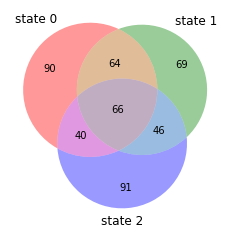

intersected genes of three states:
['TEAD2', 'ZNF781', 'E2F6', 'ZNF71', 'GFI1', 'PRDM5', 'ZNF808', 'IRF8', 'VDR', 'FOXM1', 'MTA2', 'PPARD', 'ZNF695', 'ZBTB7B', 'SRA1', 'ZFY', 'BHLHE41', 'HCFC1', 'ZNF416', 'ZNF550', 'ZNF835', 'ZNF320', 'HIF3A', 'ZNF227', 'ZNF404', 'ZNF208', 'ZNF253', 'ZNF700', 'ZNF69', 'ZNF652', 'TADA2A', 'ZNF774', 'HIF1A', 'TBPL2', 'NFATC4', 'KLF5', 'SOHLH2', 'ZNF384', 'ZNF239', 'ESRRA', 'ELF5', 'PLAG1', 'FOXO4', 'ELK1', 'ZNF165', 'WHSC1', 'ZNF639', 'TSC22D2', 'C9orf139', 'SUCLG2', 'TYW1', 'RHOT1', 'RP11-556E13.1', 'SLC30A9', 'HPGD', 'NSUN2', 'ZBTB45', 'ZNF331', 'CEBPA', 'ZNF266', 'CEBPB', 'NFIL3', 'NFKBIE', 'EGR1', 'MYCN', 'HLX']
-------
NR4A2


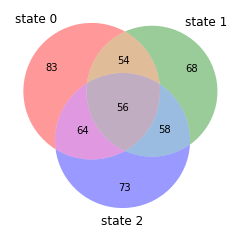

intersected genes of three states:
['TEAD2', 'MYBL2', 'PRDM5', 'ACLY', 'ZNF629', 'KLF16', 'ZNF140', 'VDR', 'PRKRIR', 'TMED8', 'ZBTB7B', 'PTOV1', 'ZFY', 'ZNF550', 'ZNF835', 'ZNF816', 'HIF3A', 'FOXA3', 'RELB', 'ZNF253', 'WIZ', 'ZNF443', 'ZNF627', 'ZNF555', 'ZNF554', 'ADNP', 'TBPL2', 'NFATC4', 'SOHLH2', 'ZNF384', 'ESRRA', 'WT1', 'ZNF883', 'TOX', 'PLAG1', 'ZNF275', 'FOXO4', 'ZNF322', 'EBF1', 'ETV5', 'SNHG10', 'RP11-556E13.1', 'METAP1', 'NSUN2', 'ZNF574', 'ZNF98', 'ZNF85', 'ZNF799', 'LGALS1', 'EGR2', 'ZNF408', 'UBQLN2', 'ETV7', 'ZNF595', 'THRB', 'MYCN']
-------
SP100


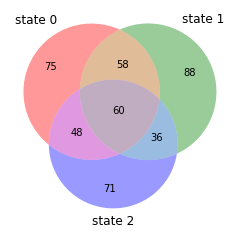

intersected genes of three states:
['ZNF335', 'MYBL2', 'ZNF629', 'ZNF528', 'ZNF616', 'ZNF558', 'SNAI3', 'IRF8', 'MTA2', 'ZXDA', 'SDSL', 'ID4', 'BHLHE41', 'ZNF74', 'ZNF837', 'ZNF816', 'ZNF320', 'FOXA3', 'ZNF155', 'ZNF575', 'ZNF540', 'ZNF69', 'ZNF554', 'ZNF267', 'IQGAP1', 'NFATC4', 'SOHLH2', 'EMX2', 'ELF5', 'WT1', 'CCDC171', 'RC3H2', 'ZNF883', 'ZNF16', 'ZNF696', 'ZNF275', 'TFE3', 'ZNF165', 'ZNF322', 'CLOCK', 'MSX1', 'WHSC1', 'MTF1', 'SUCLG2', 'NOTCH4', 'AFF3', 'SERPINB9', 'KDM5D', 'ZNF98', 'NR2F6', 'ZNF559', 'GLE1', 'SREBF1', 'MAF', 'NKX2-3', 'EGR2', 'FOSL1', 'BATF2', 'FAM46C', 'MYCN']
-------
LRRFIP1


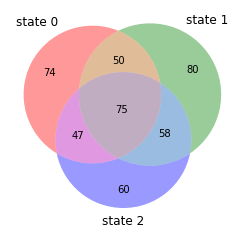

intersected genes of three states:
['TEAD2', 'ZNF429', 'ZNF335', 'ZNF577', 'GFI1', 'PRDM5', 'ZNF350', 'ZNF784', 'ZNF558', 'FOXM1', 'NR1H3', 'FOXJ3', 'ZNF17', 'SELPLG', 'CTD-3184A7.4', 'PTOV1', 'ID4', 'ZFY', 'BHLHE41', 'ZNF816', 'HIF3A', 'RELB', 'ZNF155', 'ZNF404', 'ZNF540', 'ZNF443', 'ZNF700', 'ZNF627', 'ZNF57', 'ZNF554', 'ADNP', 'ZNF232', 'ZNF774', 'SOHLH2', 'ZNF239', 'ESRRA', 'WT1', 'RC3H2', 'ZNF275', 'FOXO4', 'ZBED1', 'ZNF184', 'EBF1', 'MSX1', 'DPEP2', 'BCKDHB', 'ZNF670', 'MEG3', 'PSMA6', 'NLRP3', 'ABO', 'MIF-AS1', 'SUCLG2', 'SLC27A5', 'DCAF8', 'ZWINT', 'ZNF444', 'ZNF296', 'NR2F6', 'CEBPB', 'NCOA3', 'GLE1', 'THRA', 'MAF', 'CTCF', 'ZNF48', 'SMAD3', 'RFXAP', 'ZNF408', 'NFIL3', 'ZNF711', 'ZFP57', 'PAX8', 'ZNF691', 'HIVEP3']
-------
SATB1


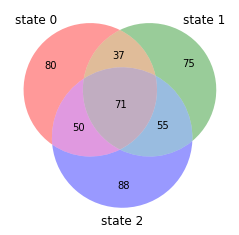

intersected genes of three states:
['TEAD2', 'MEF2A', 'ZNF891', 'ATF2', 'ZNF577', 'GFI1', 'RORA', 'HMGXB3', 'KLF16', 'ZNF257', 'ZNF558', 'ZNF516', 'VDR', 'FOXM1', 'ZXDA', 'PPARD', 'ZNF695', 'ZBTB7B', 'AC002310.12', 'ZNF837', 'ZNF416', 'ZNF155', 'ZNF714', 'ZNF430', 'ZNF69', 'HOXB7', 'ZNF263', 'ESR2', 'TBPL2', 'NFATC4', 'KLF5', 'SOHLH2', 'EMX2', 'ZNF239', 'ELF5', 'WT1', 'ZNF696', 'TFE3', 'THAP5', 'ZNF184', 'MSX1', 'ZNF639', 'ELANE', 'ANXA2', 'MIF-AS1', 'IMPA1', 'NSUN2', 'MCAT', 'ZBTB45', 'ZNF331', 'ZNF574', 'ZNF266', 'MIER2', 'HOXB4', 'SREBF1', 'EGR2', 'KDM2A', 'FOSL1', 'BATF2', 'ASCL2', 'KLF9', 'NFKBIE', 'ZFP57', 'MXD3', 'EGR1', 'SMAD1', 'THRB', 'FOSL2', 'ZNF691', 'HIVEP3', 'AZU1']
-------
LRRFIP2


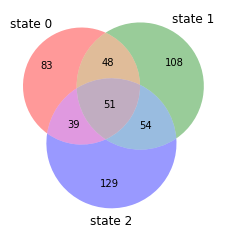

intersected genes of three states:
['TEAD2', 'ZNF335', 'MYBL2', 'ZNF577', 'GFI1', 'PRDM5', 'ZNF629', 'ZNF808', 'ZNF528', 'ZNF257', 'ZNF558', 'IRF8', 'ZNF140', 'FOXM1', 'ZNF695', 'FOXJ3', 'ZNF213-AS1', 'GLA', 'AC002310.12', 'ID4', 'BHLHE41', 'ZNF74', 'ZNF671', 'ZNF320', 'FOXA3', 'ZNF575', 'ZNF540', 'ZNF443', 'ZNF774', 'NFATC4', 'SOHLH2', 'ELF5', 'WT1', 'ZNF462', 'FOXO4', 'THAP5', 'MSX1', 'ZNF639', 'TYW1', 'HPGD', 'ZNF211', 'ZNF181', 'MESP1', 'EGR2', 'ZNF467', 'EHD4', 'ETV7', 'TCF7', 'NR1D2', 'PAX8', 'MYCN']
-------
CSRNP1


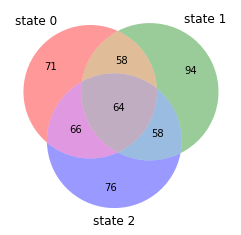

intersected genes of three states:
['E2F6', 'RORA', 'ZNF528', 'ZNF616', 'ZNF516', 'SNAI3', 'ZNF10', 'NR1H3', 'ZNF695', 'AC002310.12', 'BHLHE41', 'HCFC1', 'ATF5', 'FOXA3', 'ZNF540', 'ZNF507', 'ZNF208', 'WIZ', 'ZNF57', 'HOXB7', 'NR1D1', 'ZNF232', 'MGA', 'STAT6', 'STAT2', 'ZNF384', 'EMX2', 'ESRRA', 'WT1', 'PBX3', 'ZNF883', 'ZNF786', 'ZNF3', 'ZBTB24', 'ZSCAN26', 'ZNF322', 'EBF1', 'MSX1', 'ETV5', 'ZNF654', 'MIXL1', 'ZNF362', 'MFSD14A', 'C9orf139', 'FBXL5', 'KLHL23', 'CCZ1', 'KDM5D', 'ZBTB45', 'ZNF98', 'ZNF799', 'ZNF823', 'HYPK', 'THRA', 'EGR2', 'BATF2', 'ZNF467', 'HBP1', 'AHR', 'RXRB', 'ZFP57', 'THRB', 'PAX8', 'MYCN']
-------
SMARCC1


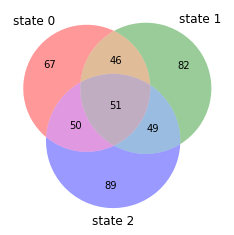

intersected genes of three states:
['TEAD2', 'ZNF335', 'ZNF577', 'GFI1', 'ZNF707', 'PRDM5', 'RORA', 'RUNX2', 'HMGXB3', 'KLF16', 'ZNF616', 'FOXO1', 'VDR', 'ZNF76', 'ZNF695', 'ZNF17', 'MED13L', 'GNB2', 'MICU1', 'PTOV1', 'ID4', 'BHLHE41', 'ZNF835', 'ZNF208', 'ZNF426', 'ZNF555', 'ARID3A', 'TBPL2', 'IQGAP1', 'KLF5', 'SOHLH2', 'TFCP2', 'ZNF239', 'WT1', 'ZNF696', 'ZNF275', 'ZNF165', 'ZBED6', 'ZNF362', 'NOTCH4', 'NSUN2', 'ZNF574', 'CEBPA', 'HOXB3', 'THRA', 'NEUROD2', 'EGR2', 'FOSL1', 'ZNF445', 'PAX8', 'HLX']
-------
FOXP1


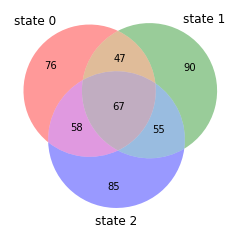

intersected genes of three states:
['TEAD2', 'MEF2A', 'ATF2', 'ZNF707', 'PRDM5', 'RORA', 'ZNF629', 'ZNF616', 'ZNF136', 'IRF8', 'FOXO1', 'VDR', 'ZXDA', 'PPARD', 'ZNF501', 'ZBTB7B', 'FOXJ3', 'HCFC1', 'ZNF74', 'ZNF837', 'HIF3A', 'ZNF420', 'ZNF208', 'ZNF14', 'ZNF700', 'ZNF555', 'HOXB7', 'NR1D1', 'ZNF263', 'ESR2', 'ZNF384', 'ELF5', 'PBX3', 'ZNF462', 'ZNF16', 'PLAG1', 'ZNF275', 'EBF1', 'ETV5', 'SNHG10', 'C21orf58', 'PSMA6', 'CPVL', 'NOTCH4', 'RP11-556E13.1', 'UNC45A', 'EPCAM', 'NSUN2', 'DMRTA1', 'ETS2', 'NR2F6', 'ZNF799', 'ZNF823', 'NFATC1', 'MAFG', 'SREBF1', 'MTA1', 'RFXAP', 'NKX2-3', 'FOSL1', 'ASCL2', 'NFIL3', 'AR', 'ZNF92', 'GABARAPL1', 'THRB', 'PAX8']
-------
BBX


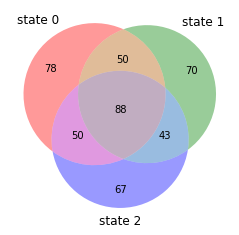

intersected genes of three states:
['TEAD2', 'MEF2A', 'ZNF781', 'ZNF429', 'ZNF577', 'ZNF71', 'GFI1', 'ZNF707', 'PRDM5', 'RORA', 'ZNF350', 'ZNF528', 'ZNF558', 'ZNF516', 'VDR', 'AEBP2', 'FOXM1', 'PRKRIR', 'NR1H3', 'ZXDA', 'PPARD', 'ZNF501', 'ZNF695', 'ZNF17', 'SELPLG', 'CTD-3184A7.4', 'PI4KA', 'ID4', 'BHLHE41', 'ZNF74', 'ZNF837', 'HIF3A', 'FOXA3', 'ZNF575', 'ZNF792', 'ZNF208', 'ZNF253', 'ZNF627', 'PMS2', 'NR1D1', 'ZNF267', 'ZNF174', 'ZNF263', 'ZNF774', 'ZBTB1', 'ESR2', 'TBPL2', 'STAT6', 'EMX2', 'ELF5', 'WT1', 'ZNF696', 'TFE3', 'FOXK1', 'EBF1', 'CLOCK', 'MSX1', 'ETV5', 'HESX1', 'ZNF514', 'ANXA2', 'NLRP3', 'NOTCH4', 'AFF3', 'TYW1', 'HPGD', 'MAFF', 'KDM5D', 'ZNF211', 'ZNF296', 'ZNF266', 'NEUROD2', 'MAF', 'SMAD3', 'MTA1', 'RFXAP', 'NFKB2', 'EGR2', 'FOSL1', 'ASCL2', 'NFIL3', 'ZNF711', 'ETV7', 'TCF7', 'THRB', 'NR1D2', 'HLX', 'ETV3']
-------
KLF15


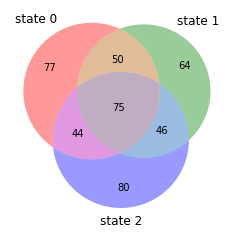

intersected genes of three states:
['TEAD2', 'MYBL2', 'PRDM5', 'RORA', 'ZNF629', 'RUNX2', 'ZNF350', 'ZNF667', 'ZNF784', 'ZNF528', 'ZNF558', 'IRF8', 'ZNF10', 'VDR', 'ZXDA', 'ZNF695', 'ID4', 'ZFY', 'BHLHE41', 'PPARA', 'ZNF416', 'ZNF835', 'ZNF320', 'HIF3A', 'FOXA3', 'RELB', 'ZNF155', 'ZNF404', 'ZNF575', 'ZNF792', 'ZNF507', 'ZNF14', 'ZNF443', 'ZNF555', 'NR1D1', 'ZNF774', 'ESR2', 'HIF1A', 'TBPL2', 'TFDP1', 'KLF5', 'SOHLH2', 'ZNF84', 'STAT2', 'WT1', 'RC3H2', 'ZNF883', 'ZNF696', 'ZNF275', 'FOXO4', 'ZNF786', 'ZNF165', 'ZNF354A', 'MSX1', 'ZNF670', 'MIXL1', 'ZBED6', 'ZNF362', 'PRDM16', 'LINC00665', 'NLRP3', 'TMEM38B', 'DMRTA1', 'KDM5D', 'ZNF211', 'ZNF525', 'ZNF823', 'CEBPB', 'HOXB3', 'LGALS1', 'RFXAP', 'EGR2', 'FOSL1', 'NFIL3', 'AHR']
-------
TFDP2


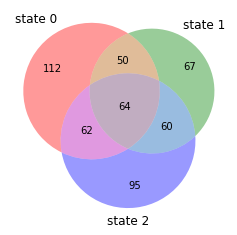

intersected genes of three states:
['MYBL2', 'ZNF577', 'ZNF71', 'GFI1', 'ZNF707', 'RORA', 'ZFHX3', 'ZNF784', 'ZNF345', 'ZNF558', 'IRF8', 'GATC', 'TMED8', 'ZXDA', 'RERE', 'ESYT2', 'ADAL', 'PTOV1', 'BHLHE41', 'ZNF74', 'ATF5', 'FOXA3', 'ZNF227', 'ZNF155', 'ZNF208', 'ZNF700', 'ZNF77', 'MAZ', 'CNOT1', 'ZNF774', 'ESR2', 'HIF1A', 'IQGAP1', 'KLF5', 'SOHLH2', 'ELK3', 'ZNF384', 'ESRRA', 'ELF5', 'ZNF696', 'TFE3', 'ELK1', 'ZNF165', 'ETV5', 'ZNF639', 'C9orf139', 'TYW1', 'TBK1', 'ZWINT', 'DMRTA1', 'ZBTB45', 'ZNF211', 'ZNF93', 'ZNF266', 'MIER2', 'HOXB4', 'NEUROD2', 'BAALC', 'TCF7', 'SMAD1', 'LRP10', 'BHLHE40', 'PAX8', 'MYCN']
-------
MXD4


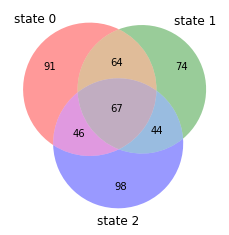

intersected genes of three states:
['TEAD2', 'MYBL2', 'ZNF577', 'ZNF71', 'GFI1', 'PRDM5', 'ZNF566', 'KAT6A', 'ZNF629', 'CYFIP2', 'ZNF784', 'ZNF528', 'ZNF616', 'IRF8', 'FOXM1', 'MTA2', 'ZXDA', 'AC002310.12', 'BHLHE41', 'ZNF835', 'DAAM1', 'ZNF816', 'HIF3A', 'FOXA3', 'ZNF726', 'ZNF208', 'ZNF714', 'ZNF443', 'ZNF69', 'RFX2', 'ZNF555', 'ANKLE2', 'ZNF174', 'TBPL2', 'SOHLH2', 'ZNF84', 'STAT6', 'TFCP2', 'ZNF384', 'WT1', 'RC3H2', 'PLAG1', 'ZNF275', 'ELK1', 'ZSCAN21', 'EBF1', 'MSX1', 'ELANE', 'HDAC5', 'LYPD6B', 'DMRTA1', 'ZBTB45', 'ZNF296', 'ZNF574', 'CEBPA', 'ZNF799', 'MIER2', 'ZBTB4', 'SMAD3', 'FOSL1', 'ASCL2', 'NFIL3', 'UBQLN2', 'AHR', 'TCF7', 'NR1D2', 'ZNF691']
-------
REST


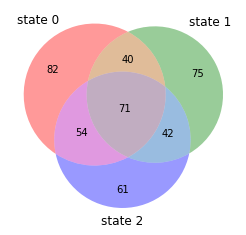

intersected genes of three states:
['TEAD2', 'ZNF781', 'TRPS1', 'MYBL2', 'ZNF577', 'GFI1', 'PRDM5', 'ZNF784', 'ZNF528', 'ZNF616', 'ZNF506', 'ZNF558', 'SNAI3', 'IRF8', 'VDR', 'FOXM1', 'PPARD', 'ZNF695', 'GMEB1', 'SDSL', 'TMOD3', 'PI4KA', 'ID4', 'ZNF816', 'HIF3A', 'FOXA3', 'ZNF227', 'ZNF404', 'ZNF575', 'ZNF540', 'ZNF793', 'ZNF208', 'ZNF69', 'ZNF77', 'ZNF57', 'ZNF652', 'HOXB7', 'NR1D1', 'ZNF267', 'IQGAP1', 'KLF5', 'ZNF384', 'ZNF239', 'WT1', 'ZNF696', 'PLAG1', 'FOXO4', 'ZNF786', 'ZNF165', 'EBF1', 'ZNF654', 'ZNF670', 'ENTPD1-AS1', 'SUCLG2', 'AFF3', 'NUPR2', 'TBK1', 'KDM5D', 'ZNF524', 'SREBF1', 'CTCF', 'RFXAP', 'BATF2', 'NFIL3', 'SLC25A1', 'AR', 'AHR', 'ETV7', 'PAX8', 'FMNL1', 'AZU1']
-------
ZBED3


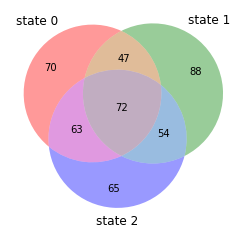

intersected genes of three states:
['TEAD2', 'ATF2', 'ZNF335', 'GFI1', 'ZNF707', 'HMGXB3', 'KLF16', 'ZNF808', 'SNAI3', 'IRF8', 'ZNF10', 'ZNF140', 'VDR', 'ZXDA', 'PPARD', 'ZNF501', 'ZNF695', 'ZBTB7B', 'FOXJ3', 'ZNF213-AS1', 'GLA', 'ZNF74', 'ZNF837', 'ZNF835', 'ZNF714', 'ZNF253', 'WIZ', 'ZNF77', 'ZNF57', 'ZNF232', 'NFATC4', 'ESRRA', 'WT1', 'ZNF696', 'PLAG1', 'FOXO4', 'ZNF786', 'ZBTB24', 'ZNF165', 'ZNF354A', 'CLOCK', 'MSX1', 'ETV5', 'TSC22D2', 'C9orf139', 'ERV3-1', 'ABO', 'RP11-14N7.2', 'AFF3', 'HPGD', 'ZNF274', 'NR2F6', 'ZNF823', 'HOXB3', 'GLE1', 'NEUROD2', 'SREBF1', 'MTA1', 'NFKB2', 'NKX2-3', 'EGR2', 'NFIL3', 'KLF9', 'SLC25A1', 'GATA1', 'KAT2A', 'ZNF92', 'ETV7', 'FAM46C', 'THRB', 'NR1D2', 'AZU1']
-------
MEF2C


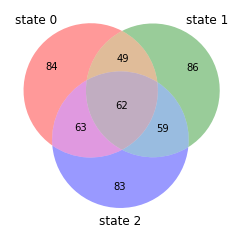

intersected genes of three states:
['ZNF605', 'MYBL2', 'ZNF577', 'GFI1', 'PRDM5', 'ZNF629', 'HMGXB3', 'ZNF784', 'ZNF528', 'ZNF616', 'IRF8', 'C16orf87', 'GATC', 'ZXDA', 'PPARD', 'ZNF501', 'ZNF17', 'ZFY', 'MZF1', 'ZNF416', 'ZNF816', 'HIF3A', 'TIA1', 'ZNF404', 'ZNF575', 'ZNF540', 'ZNF208', 'ZNF14', 'ZNF57', 'HOXB7', 'RARA', 'ZNF774', 'ESR2', 'NFATC4', 'SOHLH2', 'ZNF239', 'ELF5', 'WT1', 'RC3H2', 'ZBED1', 'ZNF212', 'WHSC1', 'ETV5', 'DPEP2', 'KLF7', 'SP3', 'MIXL1', 'PRDM2', 'PRDM16', 'GTSF1', 'NOTCH4', 'HPGD', 'ZNF211', 'ZNF296', 'NR2F6', 'ZNF799', 'ZNF823', 'MIER2', 'ZBTB4', 'MESP1', 'ZNF92', 'ETV7']
-------
IRF1


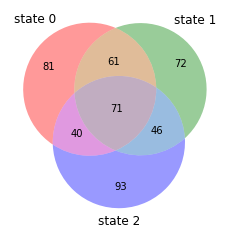

intersected genes of three states:
['TEAD2', 'MEF2A', 'MYBL2', 'GFI1', 'ZNF629', 'KLF16', 'ZNF501', 'ZNF695', 'ZBTB7B', 'ZBTB48', 'ZNF17', 'SDSL', 'ZFY', 'BHLHE41', 'PPARA', 'MZF1', 'ZNF416', 'ZNF835', 'ZNF83', 'HIF3A', 'FOXA3', 'RELB', 'ZNF227', 'ZNF208', 'ZNF700', 'HOXB5', 'NR1D1', 'TBPL2', 'NFATC4', 'KLF5', 'SOHLH2', 'STAT2', 'ZNF384', 'EMX2', 'ELF5', 'WT1', 'ZNF143', 'FOXO4', 'ZSCAN26', 'ZNF165', 'ZNF184', 'EBF1', 'CLOCK', 'KLF7', 'BCKDHB', 'ZNF496', 'PRDM2', 'C9orf139', 'CPVL', 'KANSL1-AS1', 'TBK1', 'ANKRD49', 'LRR1', 'ZBTB45', 'ZNF331', 'CEBPA', 'ZNF823', 'MIER2', 'CEBPB', 'HYPK', 'NEUROD2', 'SREBF1', 'MESP1', 'NKX2-3', 'HBS1L', 'FOSL1', 'WIPI2', 'ASCL2', 'EHD4', 'NR1D2', 'MYCN']
-------
JARID2


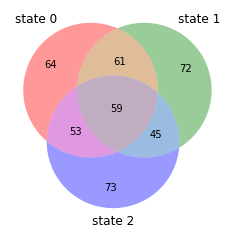

intersected genes of three states:
['TEAD2', 'ATF2', 'MYBL2', 'ZNF707', 'PRDM5', 'ZNF784', 'ZNF558', 'ZNF516', 'SNAI3', 'IRF8', 'FOXO1', 'VDR', 'AEBP2', 'ZXDA', 'PPARD', 'ZNF695', 'CMIP', 'CTD-3184A7.4', 'ID4', 'BHLHE41', 'ZNF837', 'ZNF835', 'HIF3A', 'ZNF155', 'ZNF575', 'ZNF14', 'ZNF69', 'PMS2', 'HOXB7', 'NR1D1', 'CNOT1', 'ZNF174', 'ZBTB1', 'ZNF384', 'ZNF239', 'ELF5', 'WT1', 'ZNF696', 'ZNF496', 'MIXL1', 'MTF1', 'ELANE', 'SUCLG2', 'NUPR2', 'DMRTA1', 'KDM5D', 'ZNF93', 'NR2F6', 'NFATC1', 'ZNF48', 'MESP1', 'NFKB2', 'NFIL3', 'ZNF711', 'GATA1', 'ZNF467', 'AHR', 'THRB', 'PAX8']
-------
SOX4


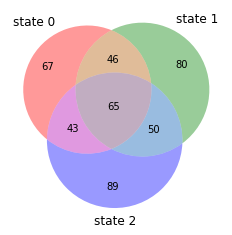

intersected genes of three states:
['ZNF781', 'MYBL2', 'GFI1', 'KLF16', 'ZNF616', 'ZNF558', 'IRF8', 'ZNF10', 'ZNF140', 'MTA2', 'ZXDA', 'PPARD', 'ZNF76', 'ZNF501', 'ZBTB7B', 'ZNF17', 'ID4', 'ZFY', 'MZF1', 'ZNF837', 'ZNF416', 'ZNF835', 'ZNF816', 'ZNF575', 'ZNF540', 'ZNF793', 'ZNF208', 'ZNF443', 'RFX2', 'ZNF77', 'ZNF555', 'ZNF652', 'HOXB7', 'ZNF774', 'ZBTB1', 'TBPL2', 'KLF5', 'ZNF239', 'ESRRA', 'ELF5', 'FOXO4', 'CSPP1', 'ZNF322', 'DPEP2', 'ZNF496', 'ZNF362', 'GTPBP8', 'CPVL', 'RP11-14N7.2', 'CPA3', 'NUTM2A-AS1', 'HPGD', 'ZNF799', 'CEBPB', 'NCOA3', 'HYPK', 'HOXB3', 'ZNF48', 'SMAD3', 'MTA1', 'NKX2-3', 'EGR2', 'BATF2', 'NFIL3', 'ETV7']
-------
ATF6B


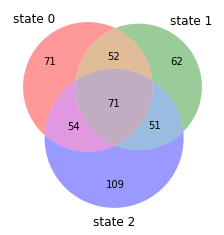

intersected genes of three states:
['TEAD2', 'MEF2A', 'ZNF605', 'ZNF335', 'MYBL2', 'GFI1', 'PRDM5', 'HMGXB3', 'ZNF784', 'ZNF808', 'ZNF257', 'IRF8', 'ZNF10', 'AEBP2', 'ZXDA', 'ZNF76', 'ZNF501', 'ZNF695', 'FOXJ3', 'UFL1', 'AC002310.12', 'PTOV1', 'ID4', 'ZNF837', 'ZNF835', 'ZNF816', 'HIF3A', 'ZNF155', 'ZNF575', 'ZNF540', 'ZNF793', 'ZNF792', 'ESR2', 'SOHLH2', 'WT1', 'FAHD2A', 'ZNF143', 'PLAG1', 'TFE3', 'ZSCAN21', 'ZNF680', 'FOXK1', 'EBF1', 'ETV5', 'ZNF654', 'MIXL1', 'ZBED6', 'SNHG10', 'AFF3', 'CPA3', 'HPGD', 'TBK1', 'KDM5D', 'ZBTB45', 'ZNF524', 'ZNF224', 'HOXB6', 'MTA1', 'NKX2-3', 'EGR2', 'NFIL3', 'KLF9', 'SLC25A1', 'ZNF711', 'GATA1', 'ZNF467', 'ETV7', 'ZNF595', 'THRB', 'NR1D2', 'ZC3H6']
-------
HMGA1


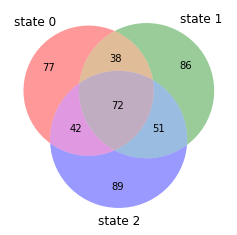

intersected genes of three states:
['TEAD2', 'ZNF335', 'ZNF577', 'GFI1', 'RORA', 'ZNF629', 'ZFHX3', 'ZNF616', 'ZNF558', 'IRF8', 'VDR', 'PPARD', 'ZNF76', 'ZNF695', 'ZNF17', 'SDSL', 'ID4', 'BHLHE41', 'ZNF837', 'ZNF671', 'ZNF416', 'ZNF320', 'ATF5', 'HIF3A', 'RELB', 'ZNF575', 'ZNF540', 'ZNF726', 'ZNF253', 'ZNF69', 'RFX2', 'ZNF57', 'HOXB7', 'RARA', 'NR1D1', 'ZNF263', 'TBPL2', 'IQGAP1', 'NFATC4', 'KLF5', 'ELK3', 'ZNF384', 'ZNF239', 'ESRRA', 'ZNF143', 'ZNF275', 'TFE3', 'MSX1', 'WHSC1', 'TSC22D2', 'SP3', 'ELK4', 'LINC01089', 'C9orf139', 'CPA3', 'HPGD', 'ZNF524', 'ZNF296', 'CEBPA', 'ZNF98', 'ZNF93', 'HOXB4', 'MTA1', 'NKX2-3', 'EGR2', 'ETV7', 'GABARAPL1', 'NR1D2', 'PAX8', 'ZC3H6', 'FOSL2', 'ZNF691']
-------
CDC5L


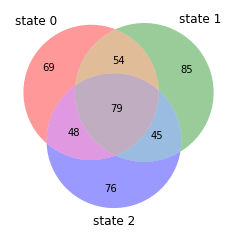

intersected genes of three states:
['MYBL2', 'E2F6', 'GFI1', 'KLF16', 'METTL17', 'ZNF528', 'ZNF345', 'ZNF136', 'SNAI3', 'IRF8', 'ZNF10', 'ZNF140', 'FOXM1', 'PPARD', 'ZBTB48', 'ZNF17', 'ID4', 'ZFY', 'BHLHE41', 'ZNF837', 'ZNF671', 'HIF3A', 'FOXA3', 'ZNF404', 'ZNF540', 'ZNF420', 'ZNF208', 'ZNF443', 'ZNF69', 'ZNF77', 'HOXB7', 'CCDC174', 'TADA2A', 'ZNF232', 'TBPL2', 'NFATC4', 'KLF5', 'SOHLH2', 'STAT6', 'ZNF239', 'ELF5', 'WT1', 'ZNF275', 'FOXO4', 'ZSCAN26', 'ZNF165', 'KLF7', 'MIXL1', 'ZNF362', 'ELANE', 'LINC01089', 'HMHA1', 'MIF-AS1', 'SUCLG2', 'DLK1', 'SYCE1L', 'LRR1', 'MCAT', 'KDM5D', 'ZNF211', 'ZNF181', 'ZNF93', 'ZNF823', 'CEBPB', 'NFATC1', 'MAF', 'SMAD3', 'MTA1', 'LGALS1', 'RFXAP', 'NKX2-3', 'EGR2', 'FOSL1', 'ZNF711', 'GATA1', 'BAALC-AS2', 'ZNF445', 'THRB', 'NR1D2']
-------
ZNF292


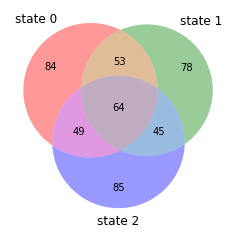

intersected genes of three states:
['MEF2A', 'ZNF891', 'KLF3', 'MYBL2', 'GFI1', 'ZNF707', 'RORA', 'ZNF629', 'KLF16', 'ZNF784', 'ZNF616', 'SNAI3', 'IRF8', 'ZNF10', 'PRKRIR', 'ZXDA', 'PPARD', 'ZBTB7B', 'FOXJ3', 'SELPLG', 'PPARA', 'ZNF837', 'ZNF416', 'ZNF835', 'ZNF880', 'ATF5', 'HIF3A', 'FOXA3', 'ZNF420', 'ZNF507', 'ZNF208', 'ZNF443', 'ZNF555', 'ZNF554', 'ZNF232', 'ZNF774', 'NFATC4', 'ZNF239', 'ELF5', 'WT1', 'FOXO4', 'EBF1', 'MSX1', 'SP3', 'ZNF670', 'MIXL1', 'LINC01089', 'RP11-589C21.6', 'ABO', 'ZNF211', 'ZNF444', 'ZNF93', 'ZNF266', 'MIER2', 'CEBPB', 'HYPK', 'NEUROD2', 'MAF', 'ZNF48', 'SMAD3', 'GPSM2', 'FOSL1', 'NFIL3', 'PAX8']
-------
ZKSCAN1


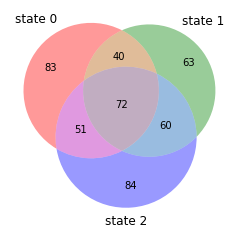

intersected genes of three states:
['TEAD2', 'MEF2A', 'MYBL2', 'PRDM5', 'ZNF629', 'ZNF350', 'ZNF784', 'ZNF808', 'IRF8', 'FOXO1', 'VDR', 'PPARD', 'ZNF76', 'ZNF695', 'CTD-3184A7.4', 'ID4', 'ZNF837', 'ZNF816', 'HIF3A', 'FOXA3', 'ZNF507', 'ZNF726', 'ZNF443', 'ZNF627', 'RFX2', 'ZNF555', 'ZNF554', 'ZNF263', 'ZNF774', 'ZBTB1', 'KLF5', 'SOHLH2', 'ZNF239', 'ESRRA', 'ELF5', 'WT1', 'ZNF883', 'ZNF696', 'PLAG1', 'ZBED1', 'ZNF680', 'MSX1', 'ZNF670', 'ELK4', 'ZBED6', 'FXYD6', 'NUPR2', 'CPA3', 'NUTM2A-AS1', 'ZWINT', 'ZBTB45', 'ZNF211', 'ZNF574', 'CEBPA', 'ZNF98', 'ZNF266', 'MIER2', 'HYPK', 'ZBTB4', 'MAF', 'CTCF', 'MESP1', 'NFKB2', 'FOSL1', 'NFIL3', 'SLC25A1', 'ZNF711', 'ZNF467', 'ZNF92', 'ETV7', 'RXRB', 'HIVEP3']
-------
TSC22D4


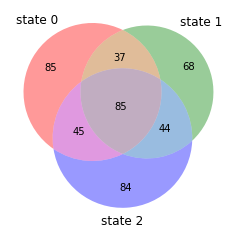

intersected genes of three states:
['TEAD2', 'MEF2A', 'GFI1', 'PRDM5', 'ZFHX3', 'ZNF784', 'ZNF808', 'ZNF528', 'ZNF558', 'IRF8', 'ZNF10', 'VDR', 'AEBP2', 'FOXM1', 'PRKRIR', 'MTA2', 'ZXDA', 'PPARD', 'ZNF76', 'ZNF501', 'COPB1', 'ZNF695', 'UFL1', 'MICU1', 'BHLHE41', 'PPARA', 'ZNF74', 'ZNF835', 'ZNF816', 'HIF3A', 'FOXA3', 'ZNF575', 'ZNF540', 'ZNF726', 'ZNF14', 'ZNF443', 'ZNF69', 'ZNF77', 'ZNF554', 'ZNF652', 'HOXB7', 'ZNF774', 'ESR2', 'TBPL2', 'IQGAP1', 'TFDP1', 'STAT2', 'ZNF384', 'EMX2', 'ELF5', 'ZNF883', 'ZNF212', 'ZNF786', 'THAP5', 'ZNF165', 'CLOCK', 'MSX1', 'ETV5', 'ZNF654', 'ZNF496', 'ZNF362', 'GAS6-AS1', 'CEP41', 'NUPR2', 'CPA3', 'PTGS2', 'TBK1', 'DMRTA1', 'ZNF211', 'ZNF98', 'ZNF799', 'ZNF823', 'MIER2', 'CEBPB', 'MESP1', 'SMAD3', 'LGALS1', 'NFKB2', 'EGR2', 'ASCL2', 'GATA1', 'ETV7', 'BAALC-AS2', 'PAX8', 'RFX5']
-------
CUX1


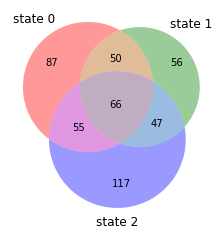

intersected genes of three states:
['TEAD2', 'KLF3', 'ZNF335', 'MYBL2', 'PRDM5', 'TCTA', 'ZNF528', 'ZNF345', 'AEBP2', 'FOXM1', 'ZXDA', 'PPARD', 'ZNF695', 'ZNF17', 'ID4', 'ZFY', 'BHLHE41', 'HCFC1', 'ZNF835', 'ZNF816', 'ZNF227', 'ZNF540', 'ZNF792', 'ZNF726', 'ZNF714', 'ZNF14', 'ZNF443', 'ZNF69', 'ZNF555', 'ZNF554', 'HOXB7', 'ZNF174', 'ZNF774', 'BATF', 'NFATC4', 'SOHLH2', 'EMX2', 'ELF5', 'WT1', 'PBX3', 'ZNF16', 'PLAG1', 'ZBTB24', 'EBF1', 'CLOCK', 'MSX1', 'WHSC1', 'HESX1', 'KLF7', 'ZNF496', 'ZNF670', 'PRDM2', 'PRDM16', 'CEP41', 'AFF3', 'ZNF211', 'CEBPA', 'ZNF799', 'CEBPB', 'SREBF1', 'MAF', 'NKX2-3', 'EGR2', 'GATA1', 'THRB', 'BHLHE40']
-------
DNAJC2


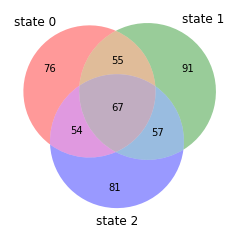

intersected genes of three states:
['TEAD2', 'MYBL2', 'E2F6', 'GFI1', 'ACLY', 'KLF16', 'ZNF616', 'ZNF345', 'ZNF257', 'ZNF558', 'IRF8', 'ARID2', 'FOXM1', 'PRKRIR', 'MTA2', 'ZXDA', 'ZNF501', 'ZNF695', 'ZFY', 'BHLHE41', 'ZNF74', 'ZNF671', 'HIF3A', 'FOXA3', 'ZNF208', 'ZNF253', 'RFX2', 'ZNF555', 'ZNF554', 'HOXB5', 'RARA', 'ZNF774', 'ESR2', 'SOHLH2', 'STAT2', 'ELF5', 'PLAG1', 'FOXO4', 'ZNF212', 'ZNF786', 'THAP5', 'EBF1', 'WHSC1', 'ZNF141', 'ETV5', 'ZNF496', 'MIXL1', 'ELK4', 'PRDM16', 'SUCLG2', 'MBTD1', 'KANSL1-AS1', 'DNAJC12', 'METAP1', 'TBK1', 'ATAD1', 'CEBPA', 'ZNF85', 'ZNF266', 'NFATC1', 'NEUROD2', 'MESP1', 'HBS1L', 'BATF2', 'ASCL2', 'ETV7', 'FOSL2']
-------
IRF5


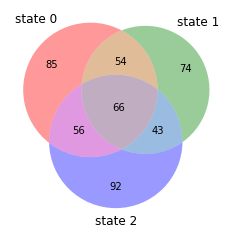

intersected genes of three states:
['TEAD2', 'MYBL2', 'ZNF577', 'GFI1', 'ZNF707', 'PRDM5', 'ZNF629', 'ZNF350', 'ZNF808', 'ZNF528', 'ZNF616', 'ZNF516', 'SNAI3', 'IRF8', 'FOXO1', 'ZNF10', 'VDR', 'AEBP2', 'FOXM1', 'PPARD', 'ZNF695', 'ZBTB7B', 'ZNF17', 'ID4', 'BHLHE41', 'ZNF837', 'ZNF575', 'ZNF420', 'ZNF507', 'ZNF208', 'ZNF443', 'ZNF69', 'RFX2', 'ZNF77', 'ZNF555', 'KLF5', 'ZNF239', 'ELF5', 'WT1', 'ZNF696', 'FOXO4', 'ZNF165', 'ZNF354A', 'EBF1', 'ZNF654', 'KLF7', 'ZNF512', 'ZNF670', 'ZNF362', 'PRDM16', 'NOTCH4', 'HPGD', 'DMRTA1', 'CEBPA', 'ZNF823', 'MIER2', 'HOXB3', 'NEUROD2', 'MTA1', 'RFXAP', 'EGR2', 'FOSL1', 'THRB', 'MYCN', 'HLX', 'ZNF691']
-------
CNOT4


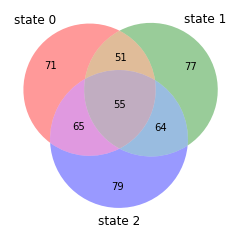

intersected genes of three states:
['TEAD2', 'ATF2', 'ZNF335', 'MYBL2', 'ZNF577', 'GFI1', 'ACLY', 'ZNF629', 'ZFHX3', 'ZNF784', 'ZNF616', 'IRF8', 'ZNF140', 'VDR', 'AEBP2', 'PRKRIR', 'PPARD', 'ZNF501', 'ZBTB7B', 'FOXJ3', 'RERE', 'CMIP', 'ZNF837', 'ZNF816', 'HIF3A', 'FOXA3', 'ZNF714', 'ZNF253', 'WIZ', 'TADA2A', 'ZNF232', 'ZNF774', 'ZBTB1', 'SOHLH2', 'ZNF239', 'WT1', 'ZNF462', 'ZNF696', 'TFE3', 'ZSCAN21', 'CSPP1', 'FOXK1', 'MSX1', 'ETV5', 'DPEP2', 'ZNF362', 'RP5-940J5.9', 'IMMP1L', 'NUPR2', 'SMAD3', 'MTA1', 'NFKB2', 'NKX2-3', 'EGR2', 'ZNF467']
-------
CREB3L2


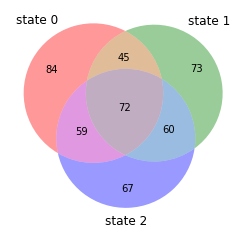

intersected genes of three states:
['TEAD2', 'MEF2A', 'TRPS1', 'ZNF577', 'GFI1', 'ZNF629', 'ZNF558', 'IRF8', 'FOXO1', 'FOXM1', 'CREM', 'ZXDA', 'ZBTB7B', 'ZNF17', 'MED13L', 'SELPLG', 'SCAI', 'ID4', 'BHLHE41', 'ZNF816', 'FOXA3', 'ZNF155', 'ZNF575', 'ZNF700', 'RFX2', 'ZNF555', 'ZNF174', 'ZBTB1', 'ESR2', 'IQGAP1', 'NFATC4', 'KLF5', 'SOHLH2', 'ZNF384', 'ESRRA', 'WT1', 'ZNF883', 'ZNF696', 'TFE3', 'ZBED1', 'ZNF680', 'CSPP1', 'HSF2', 'ZNF184', 'ZNF354A', 'EBF1', 'ZNF654', 'NOTCH4', 'AFF3', 'TYW1', 'NUPR2', 'SYCE1L', 'NUTM2A-AS1', 'NR2F6', 'ZNF799', 'ZNF823', 'ZNFX1', 'NCOA3', 'THRA', 'SREBF1', 'MAF', 'EGR2', 'FOSL1', 'NFIL3', 'EHD4', 'ETV7', 'SMAD1', 'NR1D2', 'PAX8', 'FOSL2', 'ZNF691', 'AZU1']
-------
NONO


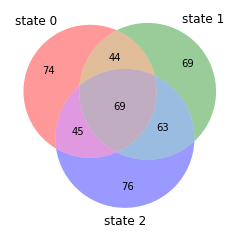

intersected genes of three states:
['ZNF429', 'ZNF335', 'MYBL2', 'ZNF71', 'PRDM5', 'ZNF350', 'ZNF784', 'ZNF528', 'ZNF558', 'IRF8', 'FOXO1', 'FOXM1', 'PRKRIR', 'ZXDA', 'PPARD', 'ZNF695', 'ZNF17', 'AC002310.12', 'ID4', 'BHLHE41', 'ZNF320', 'FOXA3', 'ZNF443', 'ZNF69', 'ZNF57', 'ZNF555', 'HOXB7', 'NR1D1', 'ZNF174', 'ZNF263', 'ZBTB1', 'ESR2', 'TBPL2', 'NFATC4', 'IRF9', 'SOHLH2', 'ZNF384', 'EMX2', 'ZNF239', 'ZNF696', 'ZNF212', 'ZNF786', 'ZSCAN21', 'EBF1', 'CLOCK', 'MSX1', 'ZNF141', 'ZNF514', 'MIXL1', 'PRIM1', 'NUPR2', 'TBK1', 'MCAT', 'DMRTA1', 'MAFF', 'KDM5D', 'ZNF296', 'ZNF93', 'CEBPB', 'MAFG', 'NEUROD2', 'SREBF1', 'SMAD3', 'NFKB2', 'FOSL1', 'NFKBIE', 'ETV7', 'THRB', 'PAX8']
-------
ATRX


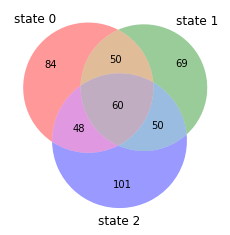

intersected genes of three states:
['ZNF429', 'ZNF577', 'RP11-332H14.2', 'ZNF558', 'VDR', 'PPARD', 'ZNF695', 'ZBTB7B', 'RERE', 'ZBTB48', 'ZNF213-AS1', 'LINC00969', 'ID4', 'ZFY', 'BHLHE41', 'ZNF74', 'ZNF816', 'RELB', 'ZNF155', 'ZNF714', 'ZNF554', 'RARA', 'TADA2A', 'CNOT1', 'ZNF774', 'ESR2', 'NFATC4', 'SOHLH2', 'ZNF84', 'ELF5', 'WT1', 'ZNF696', 'FOXO4', 'ZNF786', 'ZNF680', 'ETV5', 'ZNF639', 'KLF7', 'MIXL1', 'C9orf139', 'CPVL', 'CEP41', 'CENPU', 'TYW1', 'SYCE1L', 'PTPRN2', 'ZNF823', 'ZNF266', 'HYPK', 'NEUROD2', 'RFXAP', 'EGR2', 'FOSL1', 'BATF2', 'ETV7', 'THRB', 'NR1D2', 'PAX8', 'GFM1', 'MYCN']
-------
TSC22D3


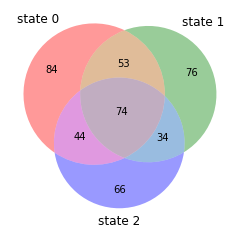

intersected genes of three states:
['TEAD2', 'MYBL2', 'ZNF577', 'E2F6', 'GFI1', 'RORA', 'ZNF629', 'ZFHX3', 'KLF16', 'ZNF784', 'IFT43', 'ZNF528', 'ZNF558', 'SNAI3', 'VDR', 'ZXDA', 'PPARD', 'ZNF695', 'PI4KA', 'SCAI', 'ID4', 'BHLHE41', 'MZF1', 'ZNF837', 'ZNF671', 'ZNF416', 'ZNF835', 'FOXA3', 'RELB', 'ZNF404', 'ZNF507', 'ZNF14', 'ZNF700', 'ZNF57', 'ZNF652', 'NR1D1', 'ZNF263', 'ZBTB1', 'TBPL2', 'NFATC4', 'KLF5', 'ELK3', 'ZNF384', 'EMX2', 'ESRRA', 'ELF5', 'TFE3', 'ZNF212', 'THAP5', 'CLOCK', 'ZNF654', 'ZBED6', 'PRIM1', 'SLC12A6', 'RP11-556E13.1', 'SYCE1L', 'NUTM2A-AS1', 'ALDH3B1', 'SMIM4', 'ZWINT', 'DMRTA1', 'MAFF', 'ZNF296', 'ZNF224', 'ZNF181', 'MESP1', 'NKX2-3', 'ASCL2', 'ZNF711', 'AHR', 'NFKBIE', 'NR1D2', 'PAX8', 'MYCN']
-------
EGR3


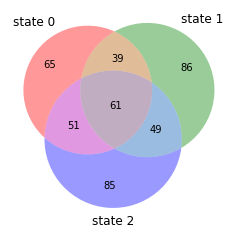

intersected genes of three states:
['TEAD2', 'ZNF781', 'KLF3', 'GFI1', 'PRDM5', 'ZNF808', 'ZNF136', 'ZNF558', 'IRF8', 'FOXM1', 'ZXDA', 'ZBTB7B', 'ZNF17', 'P2RX4', 'ID4', 'ZNF320', 'ATF5', 'FOXA3', 'ZNF575', 'MED12', 'ZNF253', 'ZNF14', 'ZNF554', 'HOXB7', 'RARA', 'NR1D1', 'ZNF263', 'ZBTB1', 'ESR2', 'NFATC4', 'KLF5', 'SOHLH2', 'EMX2', 'RC3H2', 'ZNF696', 'FOXO4', 'ZSCAN21', 'CLOCK', 'SP3', 'ZBED6', 'MTF1', 'ANXA2', 'SYCE1L', 'DMRTA1', 'ZNF296', 'ZNF181', 'ZNF799', 'ZNF823', 'SREBF1', 'CTCF', 'ZNF48', 'SMAD3', 'LGALS1', 'EGR2', 'BATF2', 'ASCL2', 'NFIL3', 'HMBOX1', 'ZNF711', 'THRB', 'HLX']
-------
KLF10


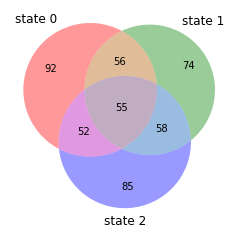

intersected genes of three states:
['MYBL2', 'SNAI3', 'IRF8', 'ZNF10', 'ZNF140', 'FOXM1', 'PPARD', 'ZNF76', 'ID4', 'PPARA', 'HIF3A', 'FOXA3', 'RELB', 'ZNF227', 'ZNF507', 'ZNF726', 'ZNF77', 'ZNF57', 'ZNF554', 'ARID3A', 'ESR2', 'IQGAP1', 'NFATC4', 'STAT2', 'ZNF384', 'ESRRA', 'ELF5', 'ZNF696', 'TOX', 'FOXK1', 'ZBTB24', 'ZSCAN26', 'EBF1', 'MSX1', 'WHSC1', 'KLF7', 'SNHG10', 'HDAC5', 'C9orf139', 'AFF3', 'NUPR2', 'METAP1', 'KDM5D', 'ZNF211', 'ZNF331', 'ZNF296', 'ZNF574', 'CEBPB', 'SREBF1', 'ASCL2', 'NFIL3', 'ZNF445', 'THRB', 'MYCN', 'HLX']
-------
NR4A3


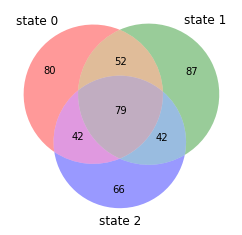

intersected genes of three states:
['MYBL2', 'GFI1', 'RUNX2', 'KLF16', 'CYFIP2', 'ZNF784', 'ZNF257', 'ZNF10', 'VDR', 'ZNF76', 'ZNF501', 'ZNF695', 'ZNF213-AS1', 'SELPLG', 'BHLHE41', 'ZNF74', 'ZNF837', 'ZNF416', 'ATF5', 'ZNF575', 'ZNF208', 'ZNF14', 'ZNF700', 'ZNF627', 'ZNF57', 'ANKLE2', 'ZNF774', 'ESR2', 'TBPL2', 'NFATC4', 'TFDP1', 'SOHLH2', 'STAT2', 'ZNF239', 'ESRRA', 'WT1', 'ZNF696', 'EBF1', 'CLOCK', 'MSX1', 'ETV5', 'ZNF654', 'SP3', 'MIXL1', 'PRDM2', 'CCDC184', 'RP11-14N7.2', 'TYW1', 'RP11-556E13.1', 'CPA3', 'KDM5D', 'ZNF331', 'ZNF296', 'CEBPA', 'ZNF98', 'NR2F6', 'ZNF266', 'CEBPB', 'NEUROD2', 'SREBF1', 'KLF13', 'NFKB2', 'NKX2-3', 'EGR2', 'FOSL1', 'BATF2', 'ZNF408', 'NFIL3', 'GATA1', 'ZNF467', 'NFKBIE', 'ETV7', 'MXD3', 'RFK', 'TCF7', 'SMAD1', 'THRB', 'IGHM', 'HIVEP3']
-------
KLF4


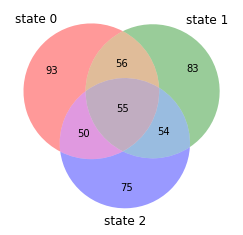

intersected genes of three states:
['TEAD2', 'ATF2', 'MYBL2', 'PRDM5', 'RORA', 'ZNF616', 'ZNF136', 'SNAI3', 'FOXO1', 'FOXM1', 'ZNF76', 'ID4', 'ZFY', 'BHLHE41', 'ZNF837', 'HIF3A', 'ZNF575', 'ZNF208', 'ZNF14', 'ZNF555', 'NR1D1', 'ZNF774', 'ESR2', 'TBPL2', 'ZNF84', 'TFCP2', 'ZNF384', 'EMX2', 'WT1', 'PBX3', 'ZNF3', 'ZNF354A', 'CLOCK', 'ZNF639', 'ZNF654', 'MIXL1', 'MTF1', 'ZNF362', 'NOTCH4', 'AFF3', 'SYCE1L', 'DMRTA1', 'MAFF', 'ZNF211', 'ZNF799', 'ZNF823', 'ZBTB4', 'FOSL1', 'BATF2', 'ASCL2', 'KLF9', 'ZNF467', 'AHR', 'TCF7', 'HLX']
-------
KMT2A


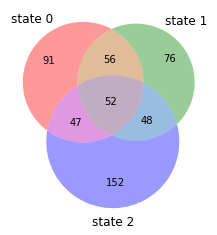

intersected genes of three states:
['TEAD2', 'ZNF429', 'ZNF335', 'MYBL2', 'PRDM5', 'IFT43', 'ZNF616', 'SNAI3', 'PPARD', 'ZNF695', 'ZBTB7B', 'ZNF17', 'ESYT2', 'BHLHE41', 'MZF1', 'ZNF837', 'ZNF416', 'ZNF550', 'HIF3A', 'RELB', 'ZNF507', 'ZNF208', 'ZNF14', 'ZNF69', 'RFX2', 'ZNF57', 'PMS2', 'NR1D1', 'MGA', 'NFATC4', 'ESRRA', 'ELF5', 'ZNF143', 'ZNF16', 'ZNF275', 'TFE3', 'ZNF184', 'EBF1', 'MSX1', 'SP140L', 'PRDM16', 'CPA3', 'PTPRN2', 'DMRTA1', 'ZNF211', 'SREBF1', 'MAF', 'ZNF48', 'SMAD3', 'FOSL1', 'GATA1', 'ZNF445']
-------
ZBTB44


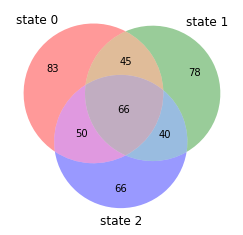

intersected genes of three states:
['TEAD2', 'ZNF781', 'TRPS1', 'ZNF335', 'MYBL2', 'ZNF71', 'GFI1', 'PRDM5', 'ZNF629', 'KLF16', 'ZNF784', 'IRF8', 'C16orf87', 'VDR', 'FOXM1', 'ZXDA', 'PPARD', 'ZNF76', 'ZNF501', 'SELPLG', 'CTD-3184A7.4', 'ID4', 'ZNF416', 'ZNF835', 'ZNF816', 'FOXA3', 'ZNF404', 'ZNF575', 'ZNF208', 'ZNF700', 'ZNF57', 'ZNF555', 'ZNF174', 'ZNF774', 'ESR2', 'TBPL2', 'NFATC4', 'KLF5', 'SOHLH2', 'TFCP2', 'ZNF384', 'ZNF143', 'ZNF883', 'ZNF462', 'PLAG1', 'ZNF354A', 'EBF1', 'ZNF496', 'SYCE1L', 'MAFF', 'ZBTB45', 'ZNF211', 'NR2F6', 'ZNF799', 'KLHL12', 'NFATC1', 'GLE1', 'NEUROD2', 'MTA1', 'LGALS1', 'EGR2', 'BATF2', 'ASCL2', 'ZNF711', 'NR1D2', 'ETV3']
-------
KLF6


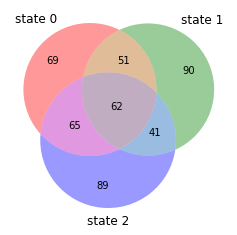

intersected genes of three states:
['MEF2A', 'TRPS1', 'MYBL2', 'GFI1', 'RORA', 'HMGXB3', 'ZNF528', 'ZNF257', 'IRF8', 'FOXO1', 'ZNF140', 'AEBP2', 'MTA2', 'ZXDA', 'ZNF76', 'ZBTB7B', 'ADAL', 'PI4KA', 'ZFY', 'ZNF74', 'ZNF416', 'ZNF835', 'ZNF816', 'HIF3A', 'RELB', 'ZNF540', 'ZNF792', 'ZNF443', 'ZNF426', 'ZNF57', 'ZNF554', 'ZNF267', 'ZNF174', 'BATF', 'NFATC4', 'KLF5', 'SOHLH2', 'ZNF84', 'RC3H2', 'ZNF696', 'ZNF3', 'ZSCAN21', 'SYMPK', 'MSX1', 'WHSC1', 'ETV5', 'NLRP3', 'SUCLG2', 'NUPR2', 'ZWINT', 'DMRTA1', 'KDM5D', 'ZBTB45', 'ZNF296', 'ZNF574', 'CEBPA', 'ZNF266', 'RFXAP', 'AR', 'EHD4', 'ETV7', 'PAX8']
-------
ZNF33A


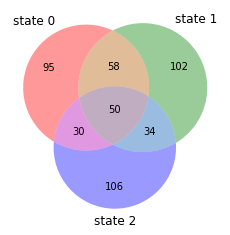

intersected genes of three states:
['RCOR3', 'TEAD2', 'ZNF335', 'ZNF577', 'E2F6', 'ZNF566', 'ACLY', 'ZNF784', 'ZNF558', 'VDR', 'ZXDA', 'PPARD', 'ZNF76', 'ZNF695', 'ZBTB7B', 'FOXJ3', 'ZNF17', 'ATP5S', 'PI4KA', 'ID4', 'ZNF416', 'HIF3A', 'ZNF227', 'ZNF540', 'ZNF792', 'ZNF208', 'PMS2', 'KLF5', 'SOHLH2', 'ZNF268', 'ZNF239', 'ESRRA', 'ELF5', 'ZNF696', 'FOXO4', 'ZNF165', 'MSX1', 'WHSC1', 'KLF7', 'SUCLG2', 'ZNF211', 'ZNF93', 'RFXAP', 'EGR2', 'BATF2', 'ASCL2', 'NFIL3', 'MXD3', 'THRB', 'MYCN']
-------
ZNF22


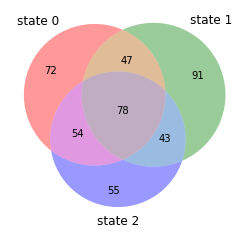

intersected genes of three states:
['MEF2A', 'ZNF781', 'MYBL2', 'ZNF577', 'E2F6', 'GFI1', 'ZNF707', 'ZNF350', 'ZNF808', 'ZNF616', 'SNAI3', 'IRF8', 'FOXO1', 'AEBP2', 'FOXM1', 'ZXDA', 'ZNF695', 'ID4', 'ZFY', 'BHLHE41', 'ZNF837', 'ZNF671', 'ZNF835', 'ZNF320', 'RELB', 'ZNF227', 'ZNF155', 'ZNF575', 'ZNF540', 'ZNF507', 'ZNF208', 'ZNF253', 'ZNF627', 'ZNF57', 'ZNF555', 'ZNF554', 'TGIF1', 'HOXB5', 'ZNF232', 'ZNF174', 'ZNF774', 'ZBTB1', 'ESR2', 'NFATC4', 'ZNF384', 'EMX2', 'ELF5', 'ZNF696', 'FOXO4', 'ZBED1', 'ZNF212', 'ZNF786', 'EBF1', 'MSX1', 'ETV5', 'ZNF639', 'ZNF496', 'PRDM16', 'NLRP3', 'NOTCH4', 'TYW1', 'ANKRD49', 'DMRTA1', 'KDM5D', 'ZBTB45', 'ZNF331', 'ZNF296', 'ZNF85', 'ZNF799', 'NEUROD2', 'SREBF1', 'ZNF711', 'HBP1', 'EHD4', 'MXD3', 'BAALC-AS2', 'GABARAPL1', 'ETV3']
-------
TFAM


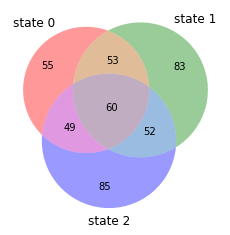

intersected genes of three states:
['ZNF605', 'TRPS1', 'MYBL2', 'ZNF577', 'E2F6', 'GFI1', 'PRDM5', 'ZNF629', 'ZNF528', 'ZNF616', 'ZNF257', 'ZNF506', 'IRF8', 'MTA2', 'ZXDA', 'ZNF695', 'ZBTB48', 'LINC00969', 'ID4', 'ZNF671', 'ZNF550', 'ZNF835', 'HIF3A', 'RELB', 'ZNF155', 'ZNF540', 'ZNF792', 'ZNF253', 'WIZ', 'ZNF443', 'ZNF700', 'ZNF77', 'ZNF554', 'PMS2', 'NFATC4', 'KLF5', 'EMX2', 'ELF5', 'WT1', 'ZNF696', 'PLAG1', 'WHSC1', 'ETV5', 'ZNF670', 'PRDM2', 'CEP41', 'SAAL1', 'CEBPA', 'ZNF98', 'HOXB4', 'NEUROD2', 'NFKB2', 'GATA3', 'BATF2', 'NFIL3', 'FAM46C', 'PAX8', 'GFM1', 'FOSL2', 'HLX']
-------
ARID5B


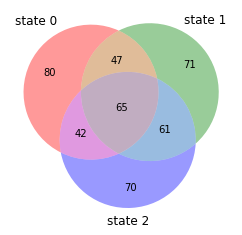

intersected genes of three states:
['TEAD2', 'MYBL2', 'RORA', 'ZNF566', 'ZFHX3', 'CYFIP2', 'ZNF667', 'ZNF808', 'ZNF528', 'ZNF558', 'ZNF140', 'VDR', 'ZXDA', 'PPARD', 'ZNF695', 'ZBTB7B', 'ZBTB48', 'ID4', 'BHLHE41', 'NNT-AS1', 'ZNF416', 'ZNF550', 'FOXA3', 'ZNF420', 'ZNF792', 'ZNF208', 'ZNF14', 'WIZ', 'ZNF700', 'NR1D1', 'ESR2', 'TBPL2', 'IQGAP1', 'ESRRA', 'WT1', 'RC3H2', 'ZNF16', 'ZNF696', 'ZNF275', 'FOXO4', 'TFE3', 'HSF2', 'EBF1', 'MSX1', 'ZNF654', 'ZNF670', 'LINC01089', 'NMD3', 'NOTCH4', 'AFF3', 'PTPRN2', 'DMRTA1', 'ZNF211', 'CEBPA', 'NCOA3', 'NFKB2', 'NKX2-3', 'EGR2', 'BATF2', 'ASCL2', 'KLF9', 'GATA1', 'ETV7', 'PAX8', 'ETV3']
-------
KAT6B


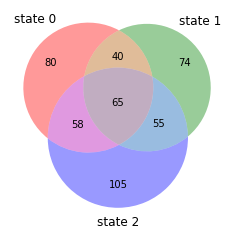

intersected genes of three states:
['ZNF891', 'GFI1', 'ZNF707', 'PRDM5', 'ACLY', 'ZNF784', 'ZNF528', 'ZNF516', 'FOXM1', 'MTA2', 'ZXDA', 'ZNF76', 'ZNF501', 'ZNF17', 'ID4', 'ZNF837', 'ZNF671', 'ZNF416', 'HIF3A', 'ZNF430', 'ZNF14', 'ZNF443', 'ZNF554', 'ANKLE2', 'TADA2A', 'ZNF232', 'ZNF174', 'ZNF774', 'ZBTB1', 'TBPL2', 'NFATC4', 'KLF5', 'SOHLH2', 'ZNF239', 'ELF5', 'ZNF883', 'ZNF16', 'THAP1', 'MSX1', 'WHSC1', 'ZNF496', 'RP5-940J5.9', 'C21orf58', 'SPNS3', 'CPA3', 'PTPRN2', 'KDM5D', 'ZNF211', 'ZNF296', 'ZNF98', 'MIER2', 'CEBPB', 'MAF', 'MTA1', 'NFKB2', 'NKX2-3', 'FOSL1', 'GATA1', 'ZNF467', 'ZNF92', 'MXD3', 'NR1D2', 'BHLHE40', 'FOSL2', 'ZNF672']
-------
HHEX


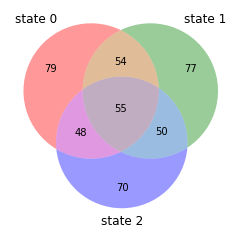

intersected genes of three states:
['ZNF605', 'ZNF781', 'TRPS1', 'MYBL2', 'ZNF707', 'PRDM5', 'ZNF629', 'KLF16', 'ZNF257', 'IRF8', 'ZNF10', 'VDR', 'FOXM1', 'PPARD', 'ZNF17', 'PHF6', 'ZFY', 'BHLHE41', 'ZNF671', 'HIF3A', 'ZNF507', 'ZNF208', 'ZNF714', 'ZNF430', 'ZNF69', 'ZNF77', 'ZNF554', 'ESR2', 'TFDP1', 'ZNF384', 'EMX2', 'WT1', 'ZNF462', 'NUTM2B-AS1', 'ZNF696', 'ZNF275', 'ZNF165', 'ZNF184', 'EBF1', 'MSX1', 'ZNF670', 'MIXL1', 'NOTCH4', 'TYW1', 'CPA3', 'HPGD', 'ZNF524', 'HBS1L', 'DEAF1', 'ZNF711', 'ETV7', 'MXD3', 'TCF7', 'MYCN', 'IGHM']
-------
ETV6


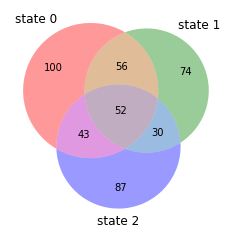

intersected genes of three states:
['TEAD2', 'MYBL2', 'PRDM5', 'RORA', 'ZNF784', 'SNAI3', 'IRF8', 'VDR', 'PRKRIR', 'MTA2', 'ZXDA', 'PPARD', 'ZNF76', 'ZNF501', 'ZNF695', 'ZBTB48', 'ZNF17', 'ESYT2', 'ZNF416', 'ZNF320', 'HIF3A', 'FOXA3', 'RELB', 'ZNF227', 'ZNF155', 'ZNF253', 'ZNF77', 'ZNF555', 'HOXB5', 'ZNF774', 'ESR2', 'TBPL2', 'NFATC4', 'TFDP1', 'SOHLH2', 'ELF5', 'WT1', 'PLAG1', 'ZNF786', 'ZNF165', 'WHSC1', 'ETV5', 'SUCLG2', 'SYCE1L', 'ZNF211', 'ZNF799', 'HOXB3', 'NKX2-3', 'ASCL2', 'ETV7', 'ZFP57', 'NR1D2']
-------
ATF1


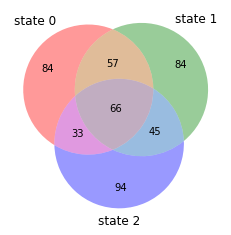

intersected genes of three states:
['TEAD2', 'MEF2A', 'ZNF605', 'ZNF891', 'GFI1', 'ZNF566', 'ACLY', 'ZNF629', 'ZFHX3', 'HMGXB3', 'KLF16', 'ZNF784', 'ZNF808', 'ZNF616', 'ZNF516', 'IRF8', 'VDR', 'MTA2', 'ZXDA', 'PPARD', 'ZNF695', 'FOXJ3', 'ZNF17', 'PHF6', 'SLC39A4', 'ID4', 'BHLHE41', 'ZNF74', 'ZNF671', 'ZNF416', 'ATF5', 'HIF3A', 'ZNF69', 'RFX2', 'ZNF77', 'ZNF57', 'ZNF554', 'ZNF774', 'ZBTB1', 'ESR2', 'TBPL2', 'NFATC4', 'SOHLH2', 'ELF5', 'ZNF462', 'ZNF275', 'TFE3', 'ZNF786', 'ZSCAN21', 'ZNF165', 'CLOCK', 'MIXL1', 'GTPBP8', 'NOTCH4', 'HPGD', 'NR2F6', 'ZNF823', 'ZBTB4', 'MESP1', 'MTA1', 'RFXAP', 'EGR2', 'BATF2', 'NFIL3', 'AHR', 'PAX8']
-------
NR4A1


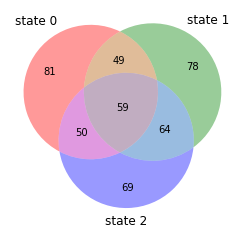

intersected genes of three states:
['TEAD2', 'ZNF781', 'ZNF891', 'MYBL2', 'GFI1', 'RORA', 'ZNF784', 'ZNF136', 'SNAI3', 'IRF8', 'VDR', 'AEBP2', 'PRKRIR', 'PPARD', 'ZNF76', 'ZNF695', 'ZBTB7B', 'ID4', 'BHLHE41', 'ZNF416', 'ZNF816', 'ZNF320', 'ZMYND8', 'ZNF69', 'HOXB7', 'RARA', 'ANKLE2', 'ZFP90', 'E2F4', 'TBPL2', 'IQGAP1', 'NFATC4', 'KLF5', 'SOHLH2', 'ZNF384', 'EMX2', 'ZNF239', 'ELF5', 'WT1', 'ZNF883', 'ZNF462', 'ZNF16', 'ZNF696', 'PLAG1', 'THAP5', 'HESX1', 'MIXL1', 'FXYD6', 'LYPD6B', 'KDM5D', 'ZNF296', 'ZNF823', 'HOXB3', 'MESP1', 'NKX2-3', 'EGR2', 'FOSL1', 'ETV7', 'THRB']
-------
NFE2


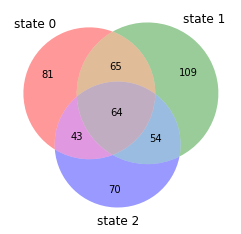

intersected genes of three states:
['ZNF891', 'ATF2', 'ZNF335', 'MYBL2', 'PRDM5', 'ZFHX3', 'ZNF784', 'ZNF257', 'ZNF140', 'VDR', 'ZNF501', 'ZNF695', 'ZBTB7B', 'ZNF17', 'PI4KA', 'ID4', 'ZFY', 'ZNF837', 'ZNF550', 'HIF3A', 'ZNF404', 'ZNF792', 'ZNF555', 'ZNF554', 'NR1D1', 'ZNF174', 'ZBTB1', 'TBPL2', 'SOHLH2', 'ELK3', 'EMX2', 'ZNF239', 'WT1', 'CERS6', 'ZNF275', 'FOXO4', 'ZNF212', 'ZNF165', 'EBF1', 'CLOCK', 'MSX1', 'ZNF141', 'ETV5', 'TSC22D2', 'KLF7', 'ZNF514', 'PRDM2', 'PRDM16', 'GTSF1', 'NUPR2', 'NOC4L', 'ZBTB45', 'ZNF98', 'ZNF799', 'MIER2', 'ZNFX1', 'KDM2A', 'BATF2', 'NFIL3', 'KLF9', 'ZNF92', 'NFKBIE', 'ZNF445', 'MYCN']
-------
MLXIP


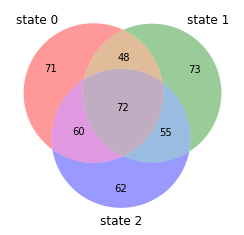

intersected genes of three states:
['TEAD2', 'WRNIP1', 'ZNF577', 'ZNF71', 'GFI1', 'ZNF629', 'KLF16', 'ZNF784', 'ZNF808', 'IRF8', 'CREM', 'ZXDA', 'ZNF695', 'ZBTB48', 'SCAMP1-AS1', 'CTD-3184A7.4', 'ID4', 'BHLHE41', 'PPARA', 'ZNF837', 'HIF3A', 'ZNF227', 'ZNF404', 'ZNF575', 'ZNF540', 'ZNF792', 'ZNF507', 'ZNF253', 'ZNF14', 'WIZ', 'ZNF443', 'ZNF426', 'RFX2', 'MGA', 'TBPL2', 'SOHLH2', 'EMX2', 'ESRRA', 'PLAG1', 'EBF1', 'CLOCK', 'ETV5', 'ZNF654', 'HESX1', 'ZNF496', 'ZBED6', 'ZNF362', 'C21orf58', 'CIAPIN1', 'NLRP3', 'TOMM5', 'TMEM39B', 'SLC30A9', 'HPGD', 'METAP1', 'ZNF524', 'ZNF525', 'ZNF296', 'ZNF93', 'NR2F6', 'CEBPB', 'NFATC1', 'ZNF48', 'MESP1', 'MTA1', 'LGALS1', 'EGR2', 'NFKBIE', 'ZFP57', 'ZNF445', 'PAX8', 'HLX']
-------
ELF1


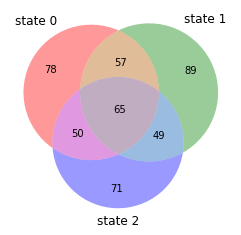

intersected genes of three states:
['MYBL2', 'GFI1', 'PRDM5', 'ZNF629', 'KLF16', 'ZNF784', 'ZNF808', 'PPIP5K2', 'ZNF558', 'IRF8', 'ZXDA', 'PPARD', 'ZNF695', 'ZBTB7B', 'ID4', 'ZFY', 'ZNF416', 'ZNF835', 'ATF5', 'FOXA3', 'ZNF575', 'MED12', 'ZNF792', 'ZNF507', 'ZNF14', 'ZNF700', 'ZNF77', 'ZNF57', 'ZNF554', 'HOXB7', 'ANKLE2', 'ESR2', 'NFATC4', 'ZNF84', 'TFCP2', 'ELF5', 'ZNF883', 'ZNF696', 'ZNF275', 'ZNF165', 'EBF1', 'ETV5', 'ZNF654', 'SP3', 'ZNF670', 'MIXL1', 'PRDM2', 'PRDM16', 'HBD', 'C9orf139', 'AFF3', 'DMRTA1', 'ZNF444', 'ZNF181', 'ZNF823', 'GLE1', 'SREBF1', 'EGR2', 'FOSL1', 'NFIL3', 'EHD4', 'NFKBIE', 'PAX8', 'RFX5', 'ZNF691']
-------
TSC22D1


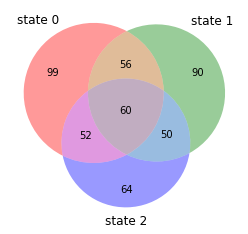

intersected genes of three states:
['TEAD2', 'ZNF335', 'PRDM5', 'RORA', 'ZFHX3', 'KLF16', 'ZNF528', 'ZNF516', 'IRF8', 'C16orf87', 'ZNF140', 'FOXM1', 'NR1H3', 'PPARD', 'ZNF76', 'ZNF501', 'ZNF695', 'ZBTB48', 'SDSL', 'SKA2', 'ZNF74', 'FOXA3', 'ZNF540', 'ZNF793', 'ZNF420', 'ZNF792', 'ZNF726', 'ZNF69', 'ZNF627', 'ZNF554', 'HOXB5', 'NR1D1', 'ZNF174', 'TBPL2', 'NFATC4', 'KLF5', 'STAT6', 'ZNF239', 'FAHD2A', 'RC3H2', 'ZNF275', 'FOXO4', 'SYMPK', 'ZNF165', 'ZNF322', 'MSX1', 'BCKDHB', 'MIXL1', 'C12orf73', 'PSMA6', 'NUPR2', 'ZBTB45', 'ZNF799', 'NCOA3', 'HOXB3', 'MESP1', 'GABARAPL1', 'PAX8', 'MYCN', 'HLX']
-------
TOX4


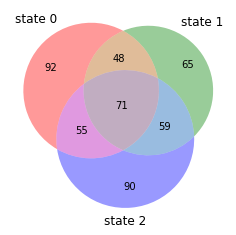

intersected genes of three states:
['TEAD2', 'MEF2A', 'ZNF891', 'ZNF71', 'GFI1', 'ZFHX3', 'ZNF784', 'ZNF616', 'ZNF136', 'ZNF558', 'ZNF140', 'ZXDA', 'ZNF213-AS1', 'ID4', 'ZFY', 'BHLHE41', 'ZNF74', 'ZNF835', 'ZNF320', 'HIF3A', 'FOXA3', 'ZNF404', 'ZNF540', 'ZNF792', 'ZNF208', 'ZNF430', 'ZNF69', 'ZNF77', 'HOXB7', 'NR1D1', 'LLNLR-245B6.1', 'TADA2A', 'ZNF774', 'TBPL2', 'NFATC4', 'TFCP2', 'ZNF239', 'ELF5', 'ZNF696', 'FOXO4', 'ZNF212', 'ZNF786', 'TFEC', 'SYMPK', 'ZNF165', 'EBF1', 'ETV5', 'ZNF670', 'ELANE', 'LINC00665', 'RP5-940J5.9', 'GAS6-AS1', 'SUCLG2', 'TYW1', 'CPA3', 'NOC4L', 'PTPRN2', 'ZBTB45', 'ZNF181', 'ZNF823', 'MIER2', 'HOXB6', 'GLE1', 'SREBF1', 'MTA1', 'FOSL1', 'ASCL2', 'ZNF467', 'ETV7', 'SLC2A3', 'PAX8']
-------
MAX


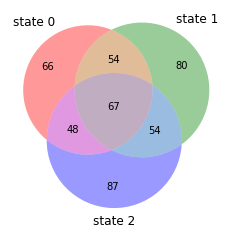

intersected genes of three states:
['TRPS1', 'ZNF891', 'ATF2', 'ZNF335', 'MYBL2', 'ZNF577', 'ZNF566', 'GPANK1', 'ZNF528', 'ZNF616', 'IRF8', 'ZNF10', 'VDR', 'AEBP2', 'ZXDA', 'ZNF695', 'ZBTB7B', 'CTD-3184A7.4', 'ID4', 'BHLHE41', 'ZNF837', 'ZNF550', 'ZNF835', 'ZNF880', 'ATF5', 'ZNF404', 'ZNF443', 'ZNF627', 'ZNF77', 'ZNF57', 'ZNF554', 'HOXB7', 'ZNF232', 'ESR2', 'TBPL2', 'NFATC4', 'PIM2', 'ZNF384', 'EMX2', 'ZNF239', 'FOXO4', 'TFE3', 'ZNF212', 'ZNF680', 'FOXK1', 'HSF2', 'ZNF165', 'MSX1', 'ZNF670', 'C21orf58', 'AFF3', 'MAFF', 'KDM5D', 'ZNF823', 'ZNF266', 'NCOA3', 'MAF', 'NKX2-3', 'EGR2', 'FOSL1', 'ZNF711', 'ZNF467', 'EHD4', 'BAALC-AS2', 'EGR1', 'PAX8', 'FOSL2']
-------
FOS


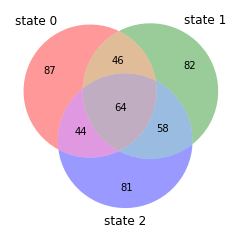

intersected genes of three states:
['TEAD2', 'ATF2', 'MYBL2', 'ZNF71', 'GFI1', 'ZNF707', 'PRDM5', 'RUNX2', 'KLF16', 'ZNF136', 'ZNF558', 'IRF8', 'ZXDA', 'ZNF695', 'ZBTB7B', 'FOXJ3', 'ZNF17', 'ID4', 'BHLHE41', 'ZNF74', 'ZNF416', 'ZNF550', 'HIF3A', 'FOXA3', 'ZNF540', 'ZNF420', 'ZNF208', 'ZNF14', 'ZNF69', 'ZNF77', 'ZNF555', 'NR1D1', 'ZNF774', 'TBPL2', 'NFATC4', 'SOHLH2', 'ZNF384', 'ZNF239', 'GCDH', 'PLAG1', 'FOXO4', 'TFE3', 'ZSCAN26', 'ZNF322', 'MSX1', 'ZNF141', 'SP3', 'ZNF670', 'MIXL1', 'CENPW', 'RP5-940J5.9', 'MIF-AS1', 'PCCB', 'ZNF331', 'ZNF574', 'ZNF181', 'ZNF93', 'MIER2', 'CEBPB', 'NEUROD2', 'SMAD3', 'NKX2-3', 'PAX8', 'MYCN']
-------
FOXN3


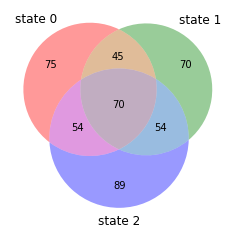

intersected genes of three states:
['TEAD2', 'ZNF605', 'TRPS1', 'ZNF429', 'MYBL2', 'ZNF707', 'PRDM5', 'RORA', 'ZNF350', 'ZNF528', 'ZNF616', 'ZNF345', 'ZNF257', 'ZNF558', 'SNAI3', 'IRF8', 'ZNF10', 'ARID2', 'FOXM1', 'MTA2', 'ZXDA', 'PPARD', 'ZBTB7B', 'ID4', 'PPARA', 'ZNF74', 'ZNF416', 'RELB', 'ZNF575', 'ZNF540', 'ZNF253', 'ZNF443', 'ZNF69', 'ZNF57', 'ZNF555', 'PMS2', 'HOXB7', 'NR1D1', 'ZNF174', 'ZBTB1', 'TBPL2', 'SOHLH2', 'ZNF384', 'EMX2', 'WT1', 'FOXO4', 'TFE3', 'ZNF165', 'ZNF184', 'BDH2', 'ZNF670', 'RP11-14N7.2', 'PCCB', 'DMRTA1', 'ZNF98', 'ZNF93', 'ZNF799', 'ZNF823', 'MAFG', 'HOXB3', 'SREBF1', 'SMAD3', 'MTA1', 'NFKB2', 'BATF2', 'ZNF711', 'ETV7', 'THRB', 'NR1D2', 'PAX8']
-------
YY1


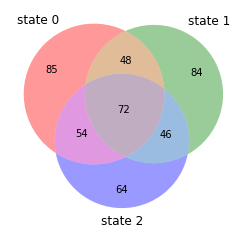

intersected genes of three states:
['ZNF781', 'MYBL2', 'GFI1', 'ZNF629', 'KLF16', 'ZNF616', 'ZNF257', 'ZNF558', 'ZNF10', 'ZNF140', 'VDR', 'FOXM1', 'PRKRIR', 'ZXDA', 'PPARD', 'ZNF501', 'ZNF695', 'ID4', 'ZFY', 'BHLHE41', 'ZNF837', 'ZNF816', 'HIF3A', 'RELB', 'WIZ', 'ZNF443', 'ZNF700', 'ZNF627', 'ZNF57', 'ZNF554', 'PMS2', 'ZNF232', 'ESR2', 'TBPL2', 'ZNF268', 'EMX2', 'ESRRA', 'ZNF696', 'FOXO4', 'ZSCAN21', 'ZBTB24', 'ZNF165', 'EBF1', 'CLOCK', 'HESX1', 'ZNF670', 'ELK4', 'TMEM106A', 'PSMA6', 'ENTPD1-AS1', 'RPL39L', 'UNC45A', 'PTPRN2', 'SNHG21', 'KDM5D', 'ZNF444', 'CEBPA', 'ZNF98', 'KLF1', 'ZNF799', 'CEBPB', 'HOXB3', 'SREBF1', 'ZBTB4', 'EGR2', 'BATF2', 'NFIL3', 'GATA1', 'AHR', 'ETV7', 'THRB', 'NR1D2']
-------
TCF25


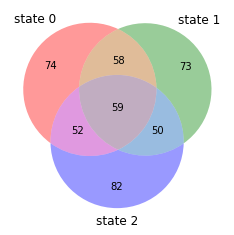

intersected genes of three states:
['TEAD2', 'ZNF335', 'MYBL2', 'GFI1', 'PRDM5', 'RUNX2', 'KLF16', 'ZNF516', 'SNAI3', 'IRF8', 'ZXDA', 'ZNF695', 'ZBTB7B', 'ZNF213-AS1', 'PHF6', 'ID4', 'ZNF837', 'ZNF416', 'ZNF550', 'ZNF835', 'ZNF816', 'HIF3A', 'FOXA3', 'ZNF575', 'ZNF714', 'ZNF700', 'ZNF69', 'GRWD1', 'RARA', 'NR1D1', 'ZNF774', 'SOHLH2', 'ELF5', 'WT1', 'ZNF696', 'PLAG1', 'FOXO4', 'FOXK1', 'ZSCAN26', 'ETV5', 'BCKDHB', 'PRDM2', 'PRDM16', 'CTSG', 'RP11-14N7.2', 'AFF3', 'SYCE1L', 'CPA3', 'PTPRN2', 'LRR1', 'ZNF181', 'CEBPB', 'SMAD3', 'FOSL1', 'ASCL2', 'NFIL3', 'ZNF711', 'ETV7', 'MYCN']
-------
NCOR1


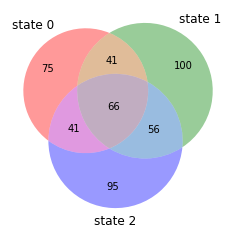

intersected genes of three states:
['TEAD2', 'TRPS1', 'GFI1', 'ZNF629', 'ZNF784', 'ZNF528', 'PPARD', 'ZNF695', 'ZBTB7B', 'CTD-3184A7.4', 'ID4', 'ZNF835', 'ZNF320', 'HIF3A', 'RELB', 'ZNF575', 'ZNF507', 'ZNF253', 'ZNF14', 'ZNF77', 'ZNF554', 'ANKLE2', 'TFAP4', 'ZNF174', 'CS', 'ZNF774', 'ESR2', 'TBPL2', 'SOHLH2', 'EMX2', 'ZNF239', 'WT1', 'ZNF462', 'ZNF696', 'ZNF275', 'FOXO4', 'ZBED1', 'ZNF212', 'ZNF165', 'ZNF496', 'GAS6-AS1', 'ENTPD1-AS1', 'HDAC5', 'AFF3', 'MBTD1', 'NUPR2', 'MAFF', 'KDM5D', 'ZNF211', 'ZNF444', 'ZNF296', 'ZNF98', 'CEBPB', 'HOXB6', 'NEUROD2', 'SREBF1', 'ZBTB4', 'MAF', 'MESP1', 'LGALS1', 'NKX2-3', 'EGR2', 'ASCL2', 'ZNF92', 'ETV7', 'GABARAPL1']
-------
SMARCE1


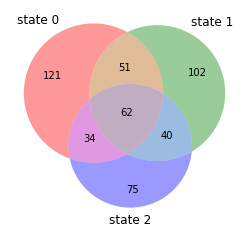

intersected genes of three states:
['MEF2A', 'ZNF891', 'KLF3', 'MYBL2', 'GFI1', 'PRDM5', 'ZNF629', 'ZNF345', 'ZNF516', 'SNAI3', 'VDR', 'ARID2', 'AEBP2', 'ZXDA', 'PPARD', 'ZNF695', 'ZNF213-AS1', 'PTOV1', 'ID4', 'ZNF550', 'HIF3A', 'ZNF540', 'ZNF507', 'RFX2', 'ZNF57', 'HOXB7', 'NR1D1', 'ZNF774', 'TBPL2', 'NFATC4', 'SOHLH2', 'ZNF384', 'EMX2', 'ZNF239', 'ELF5', 'WT1', 'ZNF16', 'PLAG1', 'CLOCK', 'ZNF639', 'MIXL1', 'MTF1', 'C9orf139', 'AFF3', 'PTPRN2', 'DMRTA1', 'ZNF211', 'ZNF296', 'ZNF98', 'ZNF93', 'ZNF799', 'CEBPB', 'HYPK', 'MAF', 'NKX2-3', 'EGR2', 'ASCL2', 'NFIL3', 'GATA1', 'MXD3', 'PAX8', 'MYCN']
-------
STAT3


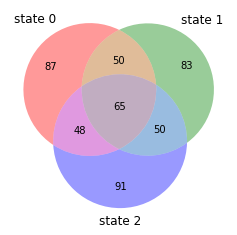

intersected genes of three states:
['KLF3', 'ZNF335', 'MYBL2', 'ZNF707', 'ZNF629', 'RUNX2', 'KLF16', 'ZNF558', 'IRF8', 'VDR', 'TMED8', 'ZXDA', 'ZBTB7B', 'ZBTB48', 'ID4', 'HCFC1', 'PPARA', 'ZNF550', 'ZNF880', 'HIF3A', 'FOXA3', 'ZNF792', 'WIZ', 'ZNF443', 'ZNF700', 'ZNF57', 'ADNP', 'HOXB7', 'ZNF267', 'ZNF774', 'IQGAP1', 'EMX2', 'ZNF239', 'WT1', 'ZNF462', 'ZNF696', 'PLAG1', 'TFE3', 'THAP5', 'CLOCK', 'ZNF141', 'ZNF670', 'PDCD4-AS1', 'TMEM107', 'SUCLG2', 'RPL39L', 'NSUN2', 'ZNF444', 'ZNF296', 'ZNF181', 'ZNF823', 'CEBPB', 'HYPK', 'HOXB6', 'MAF', 'CTCF', 'MESP1', 'BATF2', 'ASCL2', 'NFIL3', 'ETV7', 'MXD3', 'ZNF595', 'NFKBIZ', 'PAX8']
-------
HLF


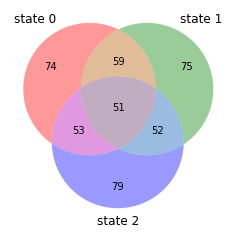

intersected genes of three states:
['TEAD2', 'MYBL2', 'ZNF577', 'PRDM5', 'RORA', 'ZNF784', 'ZNF808', 'ZNF528', 'ZNF558', 'VDR', 'PPARD', 'ZNF501', 'ZBTB7B', 'ID4', 'BHLHE41', 'HIF3A', 'ZNF404', 'ZNF793', 'ZNF443', 'ZNF700', 'ZNF555', 'HOXB7', 'ZNF263', 'ZNF774', 'NFATC4', 'TFDP1', 'KLF5', 'SOHLH2', 'STAT6', 'ZNF384', 'EMX2', 'ELF5', 'WT1', 'ZNF143', 'PLAG1', 'FOXO4', 'EBF1', 'LINC01089', 'ABO', 'CPA3', 'DMRTA1', 'NR2F6', 'ZNF799', 'ZNF823', 'MIER2', 'NCOA3', 'ASCL2', 'AR', 'FAM46C', 'HLX', 'ZNF691']
-------
ZNF521


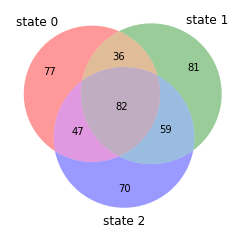

intersected genes of three states:
['TEAD2', 'KLF3', 'MYBL2', 'RP11-332H14.2', 'PRDM5', 'ZNF629', 'KLF16', 'ZNF784', 'ZNF808', 'ZNF528', 'IRF8', 'FOXO1', 'AEBP2', 'FOXM1', 'MTA2', 'ZXDA', 'PPARD', 'ZNF695', 'ZBTB7B', 'CMIP', 'BMS1', 'PTOV1', 'ID4', 'ZFY', 'BHLHE41', 'HCFC1', 'PPARA', 'ZNF837', 'ZNF320', 'ZNF226', 'ZNF792', 'ZNF507', 'ZNF253', 'ZNF443', 'ZNF69', 'ZNF627', 'ARID3A', 'HOXB7', 'TFAP4', 'ZNF774', 'ESR2', 'TBPL2', 'NFATC4', 'TFDP1', 'KLF5', 'ESRRA', 'ELF5', 'WT1', 'ZNF143', 'CERS6', 'ZNF696', 'ZNF680', 'EBF1', 'MSX1', 'ZNF141', 'ETV5', 'TSC22D2', 'ZNF654', 'ZNF496', 'MIXL1', 'MTF1', 'ZNF362', 'PRDM16', 'CCDC184', 'ANXA2', 'IMPA1', 'NOC4L', 'PTPRN2', 'ANKRD49', 'ZBTB45', 'ZNF181', 'ZNF98', 'CEBPB', 'HOXB4', 'SREBF1', 'MAF', 'EGR2', 'GATA1', 'KAT2A', 'ETV7', 'BHLHE40', 'FOSL2']
-------
ID1


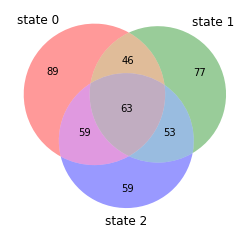

intersected genes of three states:
['TEAD2', 'ZNF335', 'MYBL2', 'ZNF577', 'GFI1', 'PRDM5', 'ZNF566', 'ZNF616', 'ZNF257', 'IRF8', 'VDR', 'AEBP2', 'FOXM1', 'PPARD', 'ZNF501', 'LINC00969', 'BMS1', 'MZF1', 'ZNF671', 'ZNF416', 'ZNF835', 'HIF3A', 'ZNF155', 'ZNF575', 'ZNF540', 'ZNF726', 'ZNF443', 'ZNF700', 'ZNF69', 'ZNF555', 'HOXB7', 'NR1D1', 'TBPL2', 'NFATC4', 'SOHLH2', 'ZNF84', 'EMX2', 'ELF5', 'PBX3', 'FOXO4', 'ZNF680', 'CSPP1', 'EBF1', 'CLOCK', 'TSC22D2', 'ZNF654', 'HESX1', 'KLF7', 'PRDM16', 'FXYD6', 'CEP41', 'MBTD1', 'KDM5D', 'ZNF211', 'ZNF525', 'ZNF146', 'NR2F6', 'CEBPB', 'NEUROD2', 'EGR2', 'FOSL1', 'MXD3', 'MYCN']
-------
TCF3


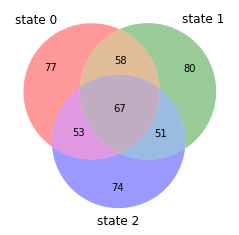

intersected genes of three states:
['RCOR3', 'TEAD2', 'ZNF891', 'ZNF577', 'ZNF707', 'ZNF629', 'ZNF667', 'ZNF784', 'ZNF345', 'ZNF10', 'ZNF140', 'VDR', 'ZXDA', 'ID4', 'ZFY', 'ZNF74', 'ZNF835', 'HIF3A', 'FOXA3', 'RELB', 'ZNF155', 'ZNF540', 'ZNF793', 'ZNF792', 'ZNF700', 'ZNF77', 'TADA2A', 'ZBTB1', 'TBPL2', 'NFATC4', 'SOHLH2', 'ZNF239', 'ZNF462', 'ZNF16', 'NUTM2B-AS1', 'ZNF696', 'FOXO4', 'TFE3', 'ZSCAN26', 'HESX1', 'KLF7', 'ZNF514', 'ANXA2', 'SUCLG2', 'MBTD1', 'SERPINB9', 'PTPRN2', 'TBK1', 'CCZ1', 'KDM5D', 'ZNF211', 'HYPK', 'NEUROD2', 'SREBF1', 'MAF', 'ZNF48', 'MESP1', 'EGR2', 'NFIL3', 'ZNF711', 'ZNF467', 'NFKBIE', 'RXRB', 'FAM46C', 'THRB', 'MYCN', 'RFX5']
-------
HMG20B


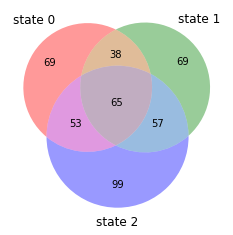

intersected genes of three states:
['MYBL2', 'E2F6', 'GFI1', 'PRDM5', 'ZNF629', 'KLF16', 'ZNF784', 'SNAI3', 'IRF8', 'VDR', 'FOXM1', 'MTA2', 'PPARD', 'ZNF695', 'PI4KA', 'ID4', 'ZNF74', 'ZNF837', 'ZNF550', 'HIF3A', 'FOXA3', 'RELB', 'ZNF404', 'RFX2', 'ZNF554', 'HOXB7', 'ZNF174', 'TBPL2', 'NFATC4', 'TFDP1', 'SOHLH2', 'YIF1B', 'ZNF268', 'ESRRA', 'ELF5', 'WT1', 'PBX3', 'NUTM2B-AS1', 'ZNF696', 'ZNF275', 'TFE3', 'ZNF212', 'FOXK1', 'ZNF141', 'ETV5', 'TSC22D2', 'MIXL1', 'MTF1', 'PRDM16', 'PDCD4-AS1', 'C9orf139', 'CPVL', 'MIF-AS1', 'TYW1', 'SURF1', 'LRR1', 'ZBTB45', 'ZNF181', 'ZNF799', 'ZNF266', 'HOXB6', 'SMAD3', 'RFXAP', 'BATF2', 'GATA1']
-------
ZNF562


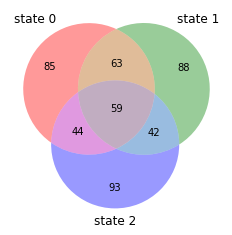

intersected genes of three states:
['TEAD2', 'ZNF891', 'ZNF335', 'MYBL2', 'GFI1', 'PRDM5', 'WDR82', 'RORA', 'KAT6A', 'ACLY', 'ZNF629', 'KLF16', 'ZNF784', 'ZNF528', 'ZNF345', 'IRF8', 'FOXO1', 'FOXM1', 'PPARD', 'ZNF501', 'ZNF695', 'ZNF837', 'ZNF320', 'HIF3A', 'FOXA3', 'ZNF404', 'ZNF253', 'ZNF443', 'ZNF700', 'ZNF69', 'ZNF555', 'NR1D1', 'ZNF174', 'ESR2', 'TBPL2', 'SOHLH2', 'ZNF84', 'STAT2', 'EMX2', 'ELF5', 'WT1', 'TFE3', 'ZNF786', 'ZNF165', 'ZNF354A', 'EBF1', 'ZNF141', 'MTF1', 'SYCE1L', 'ZNF296', 'ZNF181', 'CEBPA', 'ZNF559', 'SREBF1', 'FOSL1', 'UBQLN2', 'ETV7', 'NR1D2', 'PAX8']
-------
DNMT1


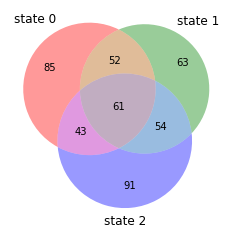

intersected genes of three states:
['TEAD2', 'PRDM5', 'KAT6A', 'KLF16', 'ZNF528', 'ZNF616', 'SNAI3', 'IRF8', 'ZNF10', 'VDR', 'FOXM1', 'MTA2', 'ZXDA', 'PPARD', 'ZNF695', 'SELPLG', 'TMOD3', 'PTOV1', 'ID4', 'BHLHE41', 'ZNF837', 'ZNF404', 'ZNF726', 'ZNF208', 'ZNF714', 'WIZ', 'ZNF57', 'ZNF555', 'MGA', 'ESR2', 'TBPL2', 'NFATC4', 'KLF5', 'SOHLH2', 'EMX2', 'WT1', 'ZNF322', 'MSX1', 'WHSC1', 'ETV5', 'ZNF496', 'MIXL1', 'PSMA6', 'NUPR2', 'SYCE1L', 'NUTM2A-AS1', 'MCAT', 'MIER2', 'NFATC1', 'HOXB3', 'ZNF48', 'SMAD3', 'NFKB2', 'ASCL2', 'ZNF711', 'GATA1', 'ZNF467', 'ETV7', 'PAX8', 'MYCN', 'AZU1']
-------
JUNB


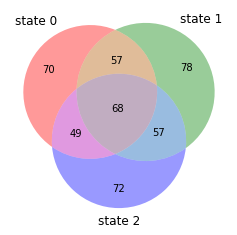

intersected genes of three states:
['TEAD2', 'TRPS1', 'KLF3', 'MYBL2', 'GFI1', 'RORA', 'ACLY', 'ZNF784', 'ZNF808', 'ZNF616', 'ZNF516', 'IRF8', 'ZNF10', 'ZNF140', 'PRKRIR', 'MTA2', 'ZXDA', 'PPARD', 'ZNF76', 'ZNF695', 'RERE', 'CTD-3074O7.5', 'MED13L', 'CMIP', 'ZFY', 'BHLHE41', 'ZNF837', 'ZNF671', 'HIF3A', 'ZNF575', 'ZNF420', 'ZNF14', 'ZNF57', 'HOXB7', 'ZFP90', 'TBPL2', 'NFATC4', 'KLF5', 'SOHLH2', 'ZNF384', 'ESRRA', 'ELF5', 'WT1', 'ZNF275', 'TFE3', 'THAP5', 'ETV5', 'ELK4', 'RNPC3', 'MIR4435-2HG', 'GTPBP8', 'MBTD1', 'NUPR2', 'TBK1', 'DMRTA1', 'ZNF444', 'ZNF146', 'CEBPA', 'ZNF98', 'NR2F6', 'ZNF266', 'KLHL12', 'ZBTB4', 'RFXAP', 'NFIL3', 'KLF9', 'PAX8', 'MYCN']
-------
KLF2


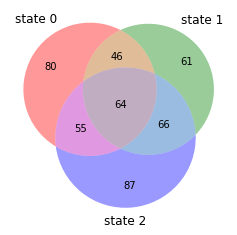

intersected genes of three states:
['TRPS1', 'GFI1', 'ZNF784', 'ZNF506', 'SNAI3', 'IRF8', 'ZNF140', 'FOXM1', 'MTA2', 'PPARD', 'ZBTB7B', 'ZNF213-AS1', 'SRA1', 'CMIP', 'ID4', 'ZFY', 'BHLHE41', 'ZNF416', 'ZNF835', 'ZNF816', 'ZNF320', 'HIF3A', 'ZNF227', 'ZNF155', 'ZNF540', 'ZNF792', 'ZNF507', 'ZNF253', 'WIZ', 'ZNF69', 'HOXB7', 'RARA', 'TFAP4', 'ESR2', 'TBPL2', 'NFATC4', 'KLF5', 'STAT2', 'ZNF239', 'ELF5', 'FOXO4', 'ZNF165', 'EBF1', 'ZNF141', 'SP110', 'MIXL1', 'C9orf139', 'TYW1', 'NUPR2', 'NUTM2A-AS1', 'NOC4L', 'NSUN2', 'ANKRD49', 'CEBPB', 'GLE1', 'MAF', 'MESP1', 'EGR2', 'ZNF467', 'EHD4', 'ETV7', 'TCF7', 'PAX8', 'MYCN']
-------
JUND


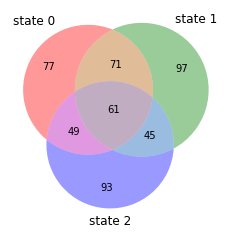

intersected genes of three states:
['RCOR3', 'TEAD2', 'ZNF345', 'ZNF257', 'ZNF516', 'IRF8', 'ZNF140', 'MTA2', 'ZXDA', 'ZBTB7B', 'LINC00969', 'SELPLG', 'ESYT2', 'ID4', 'ZNF835', 'HIF3A', 'FOXA3', 'ZNF227', 'ZNF155', 'ZNF404', 'ZNF575', 'ZNF540', 'ZNF69', 'ZNF554', 'ESR2', 'STAT6', 'WT1', 'ZNF883', 'PLAG1', 'FOXO4', 'TFE3', 'ELK1', 'ZNF786', 'TFEC', 'SP3', 'RNPC3', 'MTF1', 'CPA3', 'PTPRN2', 'KDM5D', 'ZNF525', 'CEBPA', 'ZNF799', 'HYPK', 'NEUROD2', 'ZNF48', 'MESP1', 'MTA1', 'EGR2', 'ASCL2', 'GATA1', 'ZNF467', 'ZNF800', 'HBP1', 'EHD4', 'ETV7', 'MXD3', 'RFK', 'GABARAPL1', 'PAX8', 'MYCN']
-------
RFXANK


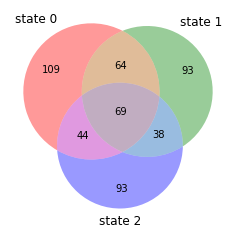

intersected genes of three states:
['TEAD2', 'ZNF781', 'ZNF335', 'MYBL2', 'GFI1', 'PRDM5', 'RORA', 'ZNF784', 'ZNF345', 'VDR', 'FOXM1', 'ZNF501', 'ZBTB7B', 'ZNF17', 'ZFY', 'BHLHE41', 'TIA1', 'ZNF443', 'ZNF57', 'ZNF555', 'NR1D1', 'ZNF174', 'ESR2', 'TBPL2', 'NFATC4', 'TFDP1', 'KLF5', 'SOHLH2', 'ZNF384', 'EMX2', 'WT1', 'ZNF16', 'FOXO4', 'TFE3', 'ZNF212', 'ZNF165', 'ZNF184', 'ZNF354A', 'EBF1', 'MSX1', 'WHSC1', 'DPEP2', 'ZNF514', 'ZNF496', 'MIXL1', 'PRDM16', 'MPO', 'SUCLG2', 'KANSL1-AS1', 'RP11-556E13.1', 'SERPINB9', 'TBK1', 'NR2F6', 'ZNF823', 'MIER2', 'ZNFX1', 'HYPK', 'HOXB3', 'NEUROD2', 'SREBF1', 'MESP1', 'SMAD3', 'EHD4', 'AHR', 'NFKBIE', 'ETV7', 'SMAD1', 'RFX5', 'AZU1']
-------
ZNF90


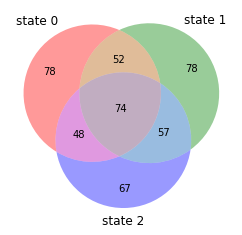

intersected genes of three states:
['TEAD2', 'ZNF335', 'ZNF577', 'GFI1', 'PRDM5', 'RORA', 'ZNF629', 'KLF16', 'ZNF784', 'ZNF808', 'ZNF528', 'ZNF616', 'ZNF257', 'IRF8', 'ZNF10', 'VDR', 'MTA2', 'ZXDA', 'PPARD', 'ZNF76', 'ZNF501', 'ZNF695', 'CMIP', 'ID4', 'BHLHE41', 'ZNF416', 'HIF3A', 'RELB', 'ZNF420', 'ZNF507', 'ZNF208', 'ZNF14', 'ZNF700', 'ZNF57', 'ZNF555', 'ZNF554', 'NR1D1', 'MGA', 'ZBTB1', 'TBPL2', 'NFATC4', 'ZNF384', 'EMX2', 'PBX3', 'ZNF883', 'PLAG1', 'TFE3', 'ZNF165', 'DPEP2', 'ZNF670', 'ZBED6', 'CCDC184', 'NLRP3', 'RP11-14N7.2', 'NOTCH4', 'RP11-556E13.1', 'ZNF211', 'ZNF444', 'ZNF224', 'ZNF823', 'SREBF1', 'MTA1', 'NKX2-3', 'HBS1L', 'EGR2', 'FOSL1', 'BATF2', 'DEAF1', 'ZNF711', 'GATA1', 'ZNF467', 'NFKBIL1', 'THRB', 'MYCN']
-------
ZNF431


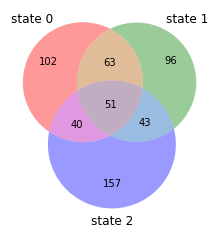

intersected genes of three states:
['TEAD2', 'ZNF781', 'ZNF335', 'MYBL2', 'ZNF577', 'GFI1', 'ZNF616', 'ZNF257', 'ZNF558', 'SNAI3', 'IRF8', 'ZNF10', 'ZXDA', 'ZNF501', 'BHLHE41', 'ZNF74', 'ZNF837', 'ZNF550', 'ZNF835', 'ZNF816', 'ZNF320', 'HIF3A', 'FOXA3', 'ZNF507', 'ZNF443', 'ZNF69', 'ZNF555', 'ZNF554', 'ZNF174', 'ZNF774', 'SOHLH2', 'ZNF384', 'ESRRA', 'ELF5', 'WT1', 'ZNF696', 'ZNF786', 'ZNF165', 'MSX1', 'ZNF141', 'ZNF639', 'DPEP2', 'PRDM16', 'KANSL1-AS1', 'SYCE1L', 'ZNF799', 'ZNF823', 'CEBPB', 'HOXB3', 'SREBF1', 'ETV7']
-------
ZNF302


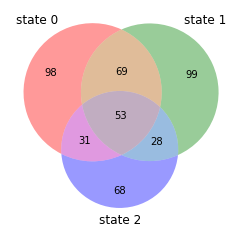

intersected genes of three states:
['TEAD2', 'TRPS1', 'ZNF891', 'ZNF335', 'MYBL2', 'ZNF577', 'GFI1', 'ZNF707', 'PRDM5', 'RORA', 'ZNF629', 'ZNF808', 'ZNF345', 'ZNF506', 'ZNF558', 'ZNF516', 'GATC', 'ZNF10', 'ZNF140', 'VDR', 'AEBP2', 'PRKRIR', 'MTA2', 'PPARD', 'ZNF501', 'ZNF695', 'ZNF17', 'ID4', 'BHLHE41', 'ZNF835', 'MAZ', 'ZNF774', 'TBPL2', 'NFATC4', 'KLF5', 'SOHLH2', 'ZNF239', 'WT1', 'ZNF16', 'ZNF275', 'TFE3', 'ZNF212', 'CLOCK', 'ZNF639', 'MIXL1', 'EPCAM', 'ZNF823', 'MTA1', 'EGR2', 'FOSL1', 'ZNF711', 'EHD4', 'PAX8']
-------
NFKBID


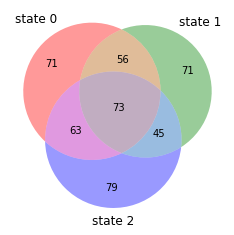

intersected genes of three states:
['MYBL2', 'ZNF577', 'PRDM5', 'ZNF629', 'KLF16', 'ZNF784', 'ZNF257', 'ZNF558', 'SNAI3', 'IRF8', 'ZNF10', 'FOXM1', 'MTA2', 'ZNF195', 'ZXDA', 'PPARD', 'ZNF695', 'ZNF17', 'CMIP', 'ID4', 'ZNF416', 'ZNF816', 'HIF3A', 'FOXA3', 'ZNF443', 'ZNF700', 'ZNF69', 'ZNF555', 'ZNF554', 'ZNF774', 'TBPL2', 'TFDP1', 'KLF5', 'SOHLH2', 'ZNF84', 'ZNF239', 'ESRRA', 'ELF5', 'WT1', 'ZNF883', 'ZSCAN26', 'ZNF354A', 'WHSC1', 'HESX1', 'ZNF496', 'ZNF670', 'MIXL1', 'TMEM106A', 'ENTPD1-AS1', 'RP11-14N7.2', 'NOTCH4', 'TYW1', 'RHOT1', 'PTPRN2', 'ANKRD49', 'DMRTA1', 'ZNF211', 'ZNF296', 'CEBPA', 'MIER2', 'ZBTB4', 'MAF', 'MESP1', 'MTA1', 'NKX2-3', 'EGR2', 'ASCL2', 'ZNF800', 'ZNF92', 'AHR', 'NFKBIE', 'SMAD1', 'NR1D2']
-------
FOSB


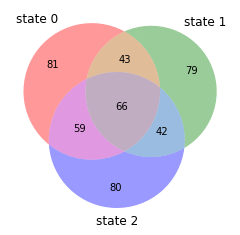

intersected genes of three states:
['TEAD2', 'MEF2A', 'MYBL2', 'GFI1', 'ZNF707', 'PRDM5', 'ZNF784', 'ZNF528', 'ZNF136', 'SNAI3', 'ZNF10', 'AEBP2', 'MTA2', 'ZXDA', 'PPARD', 'ZNF501', 'FOXJ3', 'ID4', 'BHLHE41', 'PPARA', 'ZNF74', 'ZNF816', 'FOXA3', 'ZNF227', 'ZNF540', 'ZNF420', 'ZNF700', 'ZNF69', 'ZNF77', 'ZNF554', 'ZNF232', 'ZNF774', 'TFDP1', 'STAT2', 'EMX2', 'ZNF239', 'ELF5', 'PBX3', 'ZNF883', 'FOXO4', 'ZNF212', 'EBF1', 'MSX1', 'ETV5', 'TSC22D2', 'HESX1', 'SP3', 'ZNF670', 'PHF1', 'CCDC184', 'NMD3', 'C21orf58', 'ENTPD1-AS1', 'UNG', 'NUPR2', 'LYL1', 'MIER2', 'VEZF1', 'MAF', 'EGR2', 'ZNF711', 'ZNF467', 'ETV7', 'BAALC-AS2', 'THRB', 'ZNF691']
-------
ZNF581


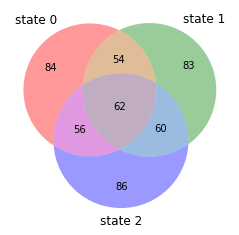

intersected genes of three states:
['RCOR3', 'TEAD2', 'ATF2', 'MYBL2', 'WDR82', 'ZNF616', 'SNAI3', 'IRF8', 'GATC', 'VDR', 'AEBP2', 'ZXDA', 'ZNF695', 'ZNF17', 'PTOV1', 'ID4', 'ZFY', 'ZNF74', 'ZNF837', 'ZNF835', 'ZNF816', 'HIF3A', 'RELB', 'ZNF227', 'ZNF404', 'ZNF792', 'WIZ', 'ZNF443', 'ZNF554', 'ARID3A', 'HOXB7', 'TBPL2', 'EMX2', 'ZNF239', 'ESRRA', 'ELF5', 'TFE3', 'ZNF786', 'ZNF184', 'ZNF354A', 'EBF1', 'ZNF639', 'CUL1', 'NOTCH4', 'SNHG21', 'MAFF', 'ZNF211', 'ZNF331', 'ZNF181', 'NR2F6', 'ZNFX1', 'ZBTB4', 'LGALS1', 'EGR2', 'FOSL1', 'BATF2', 'ASCL2', 'GATA1', 'EHD4', 'ETV7', 'BAALC-AS2', 'HLX']
-------
ZNF814


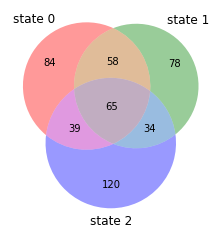

intersected genes of three states:
['TEAD2', 'KLF3', 'MYBL2', 'KLF16', 'ZNF784', 'ZNF528', 'VDR', 'ZNF695', 'ZBTB7B', 'ZNF17', 'ESYT2', 'ID4', 'ZFY', 'MZF1', 'ZNF816', 'HIF3A', 'ZNF227', 'ZNF404', 'ZNF793', 'ZNF792', 'ZNF726', 'ZNF208', 'ZNF714', 'ZNF253', 'WIZ', 'ZNF69', 'ZNF77', 'ZNF57', 'ZNF554', 'PMS2', 'ZNF652', 'ZNF263', 'ZNF774', 'NFATC4', 'TFDP1', 'ZNF268', 'ELF5', 'WT1', 'ZNF883', 'ZNF16', 'ZNF696', 'FOXO4', 'ZNF786', 'MSX1', 'ETV5', 'HESX1', 'ZNF496', 'MIXL1', 'CUL1', 'ENTPD1-AS1', 'MIF-AS1', 'RP11-556E13.1', 'ZNF93', 'NR2F6', 'ZNF823', 'ZNF266', 'KLHL12', 'MAF', 'NKX2-3', 'EGR2', 'FOSL1', 'BATF2', 'ASCL2', 'PAX8', 'HIVEP3']
-------
XBP1


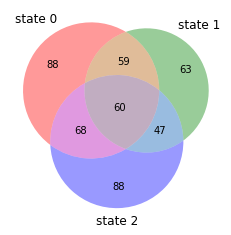

intersected genes of three states:
['TEAD2', 'MEF2A', 'ZNF891', 'ZNF577', 'GFI1', 'ZNF707', 'PRDM5', 'ZNF784', 'ZNF616', 'ZNF10', 'VDR', 'FOXM1', 'ZXDA', 'PPARD', 'ZNF695', 'CMIP', 'ZMIZ1', 'ID4', 'DAAM1', 'HIF3A', 'MED12', 'ZNF540', 'ZNF208', 'ZNF14', 'HSPBP1', 'ZNF627', 'ZNF426', 'ZNF77', 'NR1D1', 'ZNF174', 'TBPL2', 'NFATC4', 'TFDP1', 'STAT2', 'ELF5', 'ZNF16', 'ZNF696', 'PLAG1', 'FOXO4', 'ZNF165', 'ZNF184', 'EBF1', 'CLOCK', 'MSX1', 'ZNF670', 'CCDC184', 'ERV3-1', 'TYW1', 'KLHL23', 'ZWINT', 'ZNF525', 'ZNF799', 'CEBPB', 'NEUROD2', 'ZBTB4', 'MAF', 'EGR2', 'GATA1', 'ZNF467', 'ZFP57']
-------
ATF4


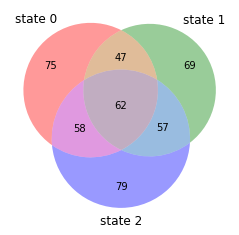

intersected genes of three states:
['MEF2A', 'TRPS1', 'MYBL2', 'ZNF577', 'E2F6', 'ZNF629', 'KLF16', 'ZNF808', 'ZNF616', 'ZNF345', 'ZNF257', 'SNAI3', 'FOXO1', 'ZNF10', 'VDR', 'CREM', 'PRKRIR', 'ZXDA', 'ZBTB7B', 'ZBTB48', 'ID4', 'ZNF837', 'ZNF835', 'ZNF816', 'ZNF320', 'HIF3A', 'FOXA3', 'RELB', 'ZNF14', 'ZNF627', 'ZNF555', 'ADNP', 'RARA', 'ZBTB1', 'TBPL2', 'IQGAP1', 'NFATC4', 'TFDP1', 'SOHLH2', 'ZNF84', 'STAT2', 'ZNF239', 'WT1', 'ZNF696', 'FOXK1', 'ZNF165', 'ZNF184', 'ZNF322', 'EBF1', 'CLOCK', 'SP3', 'PRDM16', 'SNHG10', 'TOMM5', 'RHOT1', 'CPA3', 'ANKRD49', 'CEBPB', 'THRA', 'MAF', 'ETV7', 'MYCN']
-------
PHF5A


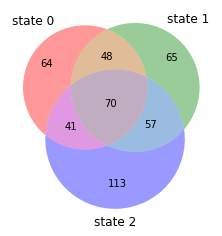

intersected genes of three states:
['TEAD2', 'ZNF781', 'ZNF577', 'GFI1', 'ZNF629', 'ZNF784', 'ZNF808', 'IRF8', 'ZNF140', 'AEBP2', 'ZXDA', 'PPARD', 'ZNF76', 'ZNF501', 'ZNF17', 'SELPLG', 'ID4', 'BHLHE41', 'ZNF837', 'ZNF550', 'ZNF835', 'ATF5', 'HIF3A', 'FOXA3', 'ZNF540', 'ZNF14', 'ZNF700', 'ZNF77', 'ZNF555', 'ZNF554', 'HOXB7', 'NR1D1', 'ZNF774', 'TBPL2', 'TFDP1', 'ZNF84', 'EMX2', 'ELF5', 'WT1', 'ZNF696', 'ZNF165', 'ZNF184', 'EBF1', 'CLOCK', 'ZNF141', 'ETV5', 'KLF7', 'PRDM16', 'LINC01089', 'C12orf73', 'FBXL5', 'RP11-556E13.1', 'SASH3', 'PTPRN2', 'LRR1', 'DMRTA1', 'KDM5D', 'ZNF98', 'ZNF799', 'CEBPB', 'MAFG', 'GLE1', 'ZNF48', 'EGR2', 'ASCL2', 'GATA1', 'ZNF467', 'ETV7', 'FOSL2', 'HIVEP3']
-------
RUNX1


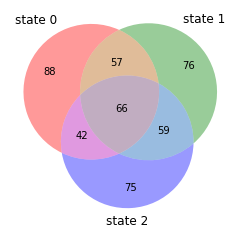

intersected genes of three states:
['TEAD2', 'ZNF891', 'MYBL2', 'ZNF784', 'IRF8', 'FOXO1', 'ZNF10', 'FOXM1', 'PRKRIR', 'ZXDA', 'PPARD', 'ZNF695', 'ZBTB7B', 'ZNF213-AS1', 'P2RX4', 'ZNF74', 'ZNF835', 'ZNF816', 'RELB', 'ZNF227', 'ZNF714', 'ZNF253', 'ZNF57', 'ZNF554', 'ARID3A', 'ZNF232', 'ZNF174', 'ZNF774', 'NFATC4', 'TFDP1', 'KLF5', 'SOHLH2', 'ZNF239', 'ZNF696', 'ZHX1', 'PLAG1', 'ZNF786', 'ZNF680', 'MSX1', 'SP3', 'ZNF670', 'MIXL1', 'LINC00665', 'CCDC184', 'ENTPD1-AS1', 'TYW1', 'NSUN2', 'ZNF296', 'CEBPA', 'NR2F6', 'CEBPB', 'NFATC1', 'SREBF1', 'MAF', 'ZNF48', 'MESP1', 'SMAD3', 'NKX2-3', 'FOSL1', 'BATF2', 'ASCL2', 'AHR', 'ETV7', 'EGR1', 'FOSL2', 'RFX5']
-------


In [13]:
for tf in TF_ids:
    print(tf)
    venn_graph_of_TF(tf, sig_target_ids_dict, intersected_targets_dict)
    print('-' * 7)